# **Notas**
## **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [492]:
import numpy as np
import pandas as pd
from numpy import log10
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


# **Base de dados** 

In [493]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# ***Especificação***
#### 1. **Coletar	dados ok**
#### 2.	**Realizar pré-processamento	dos	dados - **	


*   Definição	de	tipos - ok
*   Tratamento	de	dados	ausentes - ok
*   Normalização	e	discretização 
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
#### 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações - ok** 
#### 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças - **


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Pré-processamento** 

### Visualização dos dados

In [494]:
# Dicionário do dataframe
#df_dictionary

In [495]:
df_brazil.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,69,318,438,517,3542,416,319,1843,1689,0.708,0.687,0.830,0.622,-49.4405,-16.7588,893.6015,360,842,147.256,0,0,8583,Urbano,6201,27991,74750,36915,145858,20554,166412,8053,20665.0,Demais serviços,28227690,284,5,1,56,0,2,29,110,26,4,5,0,2,10,12,4,6,6,1,5,0,0,0,0,0,0,0,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,38,207,260,351,2709,589,4479,18017,2207,0.689,0.693,0.839,0.563,-47.3968,-18.4876,753.1249,77,296,881.064,Caminhos Do Cerrado,D,6972,Rural Adjacente,50525,25918,62689,28084,167215,12873,180089,7037,25592.0,Demais serviços,17909274,476,6,6,30,1,2,34,190,70,28,11,0,4,15,29,2,9,14,6,19,0,0,0,0,0,0,0,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,139,650,894,1087,6896,990,10307,33085,2202,0.689,0.671,0.841,0.579,-48.7188,-16.1827,1017.5506,227,720,1045.127,Região Turística Do Ouro E Cristais,C,19614,Rural Adjacente,42839,16728,138199,63396,261162,26823,287984,18427,15628.0,Demais serviços,37513019,288,5,9,26,0,2,7,117,12,57,2,1,0,7,15,3,11,5,1,8,0,0,1,34,1,1,1,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,1354,5567,7618,8905,53516,5996,25200,700872,3530,0.628,0.579,0.798,0.537,-48.8844,-1.7235,10.1203,3389,1218,1610.651,Araguaia-Tocantins,D,156292,Urbano,140464,58610,468129,486872,1154075,95180,1249255,151934,8222.0,"Administração, defesa, educação e saúde públic...",0,931,4,2,43,0,1,27,500,16,31,6,1,1,22,16,2,155,33,15,56,0,0,0,0,2,4,2,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,176,856,1233,1539,11979,2681,1862,7502,1994,0.698,0.720,0.848,0.556,-45.4462,-19.1558,644.7399,1230,1716,1817.067,Lago De Três Marias,D,23223,Urbano,113825,31003,172333,86081,403241,26994,430235,23574,18250.0,Demais serviços,0,621,18,1,40,0,1,20,303,62,30,9,6,4,28,27,2,15,19,9,27,0,0,0,0,2,2,2,2,44974716,371922572,6928,2953,0,0,0,0,4


In [496]:
 #Verificando se existe dados nulos
print(df_brazil.isnull().sum())

CITY                      0
STATE                     0
CAPITAL                   0
IBGE_RES_POP              0
IBGE_RES_POP_BRAS         0
IBGE_RES_POP_ESTR         0
IBGE_DU                   0
IBGE_DU_URBAN             0
IBGE_DU_RURAL             0
IBGE_POP                  0
IBGE_1                    0
IBGE_1-4                  0
IBGE_5-9                  0
IBGE_10-14                0
IBGE_15-59                0
IBGE_60+                  0
IBGE_PLANTED_AREA         0
IBGE_CROP_PRODUCTION_$    0
IDHM Ranking 2010         0
IDHM                      0
IDHM_Renda                0
IDHM_Longevidade          0
IDHM_Educacao             0
LONG                      0
LAT                       0
ALT                       0
PAY_TV                    0
FIXED_PHONES              0
AREA                      0
REGIAO_TUR                0
CATEGORIA_TUR             0
ESTIMATED_POP             0
RURAL_URBAN               0
GVA_AGROPEC               0
GVA_INDUSTRY              0
GVA_SERVICES        

In [497]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

<h1>Limpeza dos dados (Leandro)<h1> 

<h2>Verificando se existe dados duplicados<h2>

In [498]:
len(df_brazil)


5578

In [499]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [500]:
len(df_brazil)

5576

In [501]:
df_brazil[df_brazil['CITY'] == 'Paraty'][['CITY','STATE','LAT','LONG']]

,CITY,STATE,LAT,LONG
3561,Paraty,RJ,-23.2194,-44.7109
3562,Paraty,RJ,-23.2194,-44.7109


In [502]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [503]:
len(df_brazil)

5575

<h2>Limpeza dos dados discrepantes<h2>

In [504]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)][['CITY', 'STATE', 'AREA', 'IDHM']]


,CITY,STATE,AREA,IDHM
4448,Santa Teresinha,BA,0.0,0.587
4746,São Caetano,PE,0.0,0.000
5070,São Vicente do Seridó,PB,0.0,0.555


In [505]:
#Limpando as cidades que tem área menor que 3.565 km², pois foipesquisado que nao existe cidade menor que essetamanho de área
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] < 3.565)].index, inplace=True)

In [506]:
len(df_brazil)

5572

In [507]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)][['CITY', 'STATE', 'AREA', 'IBGE_RES_POP']]

,CITY,STATE,AREA,IBGE_RES_POP
436,Balneário Rincão,SC,63.431,0
2666,Lagoa Dos Patos,RS,10158.754,0
2673,Lagoa Mirim,RS,2859.139,0
3079,Mojuí Dos Campos,PA,4988.236,0
3569,Paraíso Das Águas,MS,5061.433,0
3722,Pescaria Brava,SC,106.853,0
3781,Pinto Bandeira,RS,104.856,0


In [508]:
#Eliminando as cidades que tem menos de 776 habitantes
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP'] < 776)].index, inplace=True)

In [509]:
len(df_brazil)

5565

In [510]:
#Verificando as cidades que tem IDHM menor que 0.0
df_brazil.loc[(df_brazil['IDHM'] == 0.0)][['CITY','STATE','IDHM','IDHM_Renda','IDHM_Longevidade','IDHM_Educacao']]

,CITY,STATE,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
4456,Santa Terezinha,BA,0.0,0.0,0.0,0.0
5066,São Vicente Do Seridó,PB,0.0,0.0,0.0,0.0


In [511]:
#Eliminando as cidades que tem IDHM menor que 0.0
df_brazil.drop(df_brazil.loc[(df_brazil['IDHM'] == 0.0)].index, inplace=True)

<h2>Limpeza dos outliers usando z-score robusto (univariado)<h2>

In [512]:
# decidi pegar a coluna GDP, o produto interno bruto de cada cidade brasileira
#df_brazil['GDP'].value_counts()

In [513]:
#df_brazil['GDP'].describe()

In [514]:
# Usando plotbox para achar os outliers
#df_brazil['GDP'].plot.box()

In [515]:
#df_brazil['GDP'].hist()

In [516]:
# Como visto em cima , os dados não estão simétricos , então aplicamos log10 e criamos uma coluna que é justamente a coluna GDP na base 10
#df_brazil['GDP_Log'] = log10(df_brazil['GDP'])
#df_brazil['GDP_Log'].hist()

In [517]:
# agora podemos usar o  z-core robusto
#from numpy import abs
#mad = abs(df_brazil['GDP_Log'] - df_brazil['GDP_Log'].median()).median()*(1/0.6745)
#print(mad)

In [518]:
# Agora vamos plotar o z-score robusto
#(abs(df_brazil['GDP_Log']-df_brazil['GDP_Log'].median())/mad).hist()

In [519]:
# Usando a limiar > 3.25, encontro os outliers
#df_brazil[abs(df_brazil['GDP_Log']-df_brazil['GDP_Log'].median())/mad > 3.25]

In [520]:
len(df_brazil)

5563

In [521]:
# Gerando novo dataframe, eliminando os outros
#df_brazil = df_brazil[abs(df_brazil['GDP_Log']-df_brazil['GDP_Log'].median())/mad < 3.25]

In [522]:
len(df_brazil)

5563

<h2>Bivariada<h2>

In [523]:
# usando duas colunas 'COMP_TOTAL' E 'AREA', que são o total de companias de cada estado e a área de em km²
#  respectivamente, percebesse alguns outliers
#df_brazil.plot.scatter(x='COMP_TOT',y='AREA', figsize=(15,15), linewidths = 10)

In [524]:
#df_brazil['COMP_AREA'] = df_brazil['COMP_TOT'] / df_brazil['AREA']

In [525]:
# Agora que fizemos a divisão, transfomando em uma univarada partir daqui repetimos na coluna comp_area o mesmo processo de z-score robusto
#df_brazil['COMP_AREA'].describe()

In [526]:
#df_brazil['COMP_AREA'].plot.box()

In [527]:
#df_brazil['COMP_AREA'].hist()

In [528]:
#df_brazil['COMP_AREA_L'] = log10(df_brazil['COMP_AREA'])
#df_brazil['COMP_AREA_L'].hist()

In [529]:
#mad = abs(df_brazil['COMP_AREA_L'] - df_brazil['COMP_AREA_L'].median()).median()*(1/0.6745)

In [530]:
#(abs(df_brazil['COMP_AREA_L']-df_brazil['COMP_AREA_L'].median())/mad).hist()

In [531]:
#df_brazil[abs(df_brazil['COMP_AREA_L']-df_brazil['COMP_AREA_L'].median())/mad > 3.5]

In [532]:
len(df_brazil)

5563

In [533]:
df_brazil.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,69,318,438,517,3542,416,319,1843,1689,0.708,0.687,0.830,0.622,-49.4405,-16.7588,893.6015,360,842,147.256,0,0,8583,Urbano,6201,27991,74750,36915,145858,20554,166412,8053,20665.0,Demais serviços,28227690,284,5,1,56,0,2,29,110,26,4,5,0,2,10,12,4,6,6,1,5,0,0,0,0,0,0,0,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,38,207,260,351,2709,589,4479,18017,2207,0.689,0.693,0.839,0.563,-47.3968,-18.4876,753.1249,77,296,881.064,Caminhos Do Cerrado,D,6972,Rural Adjacente,50525,25918,62689,28084,167215,12873,180089,7037,25592.0,Demais serviços,17909274,476,6,6,30,1,2,34,190,70,28,11,0,4,15,29,2,9,14,6,19,0,0,0,0,0,0,0,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,139,650,894,1087,6896,990,10307,33085,2202,0.689,0.671,0.841,0.579,-48.7188,-16.1827,1017.5506,227,720,1045.127,Região Turística Do Ouro E Cristais,C,19614,Rural Adjacente,42839,16728,138199,63396,261162,26823,287984,18427,15628.0,Demais serviços,37513019,288,5,9,26,0,2,7,117,12,57,2,1,0,7,15,3,11,5,1,8,0,0,1,34,1,1,1,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,1354,5567,7618,8905,53516,5996,25200,700872,3530,0.628,0.579,0.798,0.537,-48.8844,-1.7235,10.1203,3389,1218,1610.651,Araguaia-Tocantins,D,156292,Urbano,140464,58610,468129,486872,1154075,95180,1249255,151934,8222.0,"Administração, defesa, educação e saúde públic...",0,931,4,2,43,0,1,27,500,16,31,6,1,1,22,16,2,155,33,15,56,0,0,0,0,2,4,2,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,176,856,1233,1539,11979,2681,1862,7502,1994,0.698,0.720,0.848,0.556,-45.4462,-19.1558,644.7399,1230,1716,1817.067,Lago De Três Marias,D,23223,Urbano,113825,31003,172333,86081,403241,26994,430235,23574,18250.0,Demais serviços,0,621,18,1,40,0,1,20,303,62,30,9,6,4,28,27,2,15,19,9,27,0,0,0,0,2,2,2,2,44974716,371922572,6928,2953,0,0,0,0,4


In [534]:
#df_brazil = df_brazil[abs(df_brazil['COMP_AREA_L']-df_brazil['COMP_AREA_L'].median())/mad < 3.5]

In [535]:
len(df_brazil)

5563

In [536]:
#df_brazil.head()

<h2>Removendo outliers com Isolation Forests (multivariado)<h2>

In [537]:
# Primeiro passo , discretizar os dados , deixando os dados categóricos em numéricos
#df_brazil['CITY'] = df_brazil['CITY'].astype('category')
#df_brazil['STATE'] = df_brazil['STATE'].astype('category')
#df_brazil['REGIAO_TUR'] = df_brazil['REGIAO_TUR'].astype('category')
#df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].astype('category')
#df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].astype('category')
#df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].astype('category')

In [538]:
#df_brazil['STATE'].cat.categories

In [539]:
#df_brazil.head()

In [540]:
#df_brazil['CITY'] = df_brazil['CITY'].cat.codes
#df_brazil['STATE'] = df_brazil['STATE'].cat.codes
#df_brazil['REGIAO_TUR'] = df_brazil['REGIAO_TUR'].cat.codes
#df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].cat.codes
#df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].cat.codes
#df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].cat.codes

In [541]:
#from sklearn.ensemble import IsolationForest
#rng = np.random.RandomState(42)
#clf = IsolationForest(max_samples=100, random_state=rng)
#clf.fit(df_brazil)

In [542]:
#scores = clf.predict(df_brazil)
#scores

In [543]:
#df_brazil['outlier'] = scores
#print(df_brazil.head())

In [544]:
#df_brazil[df_brazil['outlier'] == -1]


In [545]:
#nova dataframe sem os campos com -1, ou seja sem os outliers
#df_brazil = df_brazil[df_brazil['outlier'] != -1]
#len(df_brazil)

### Discretização de dados 

In [546]:
#Setando campos como categóricos
#ajustando tipos dos dados
df_brazil['CAPITAL'] = df_brazil['CAPITAL'].astype('category')
df_brazil['STATE'] = df_brazil['STATE'].astype('category')
df_brazil['CATEGORIA_TUR'] = df_brazil['CATEGORIA_TUR'].astype('category')
df_brazil['GVA_MAIN'] = df_brazil['GVA_MAIN'].astype('category')
df_brazil['RURAL_URBAN'] = df_brazil['RURAL_URBAN'].astype('category')



In [547]:
df_brazil[['CAPITAL','STATE','CATEGORIA_TUR','GVA_MAIN','RURAL_URBAN']].dtypes

CAPITAL          category
STATE            category
CATEGORIA_TUR    category
GVA_MAIN         category
RURAL_URBAN      category
dtype: object

#### IDHM

In [548]:
df_brazil['IDHM_dist'] = 'Muito Baixo'

In [549]:
df_brazil.loc[(df_brazil['IDHM'] <= 0.499),'IDHM_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.5) & (df_brazil['IDHM'] <= 0.599),'IDHM_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM'] >= 0.6) & (df_brazil['IDHM'] <= 0.699),'IDHM_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM'] >= 0.7) & (df_brazil['IDHM'] <= 0.799),'IDHM_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM'] >= 0.8) & (df_brazil['IDHM'] <= 1),'IDHM_dist'] = 'Muito Alto'
df_brazil['IDHM_dist'] = df_brazil['IDHM_dist'].astype('category')

In [550]:
df_brazil['IDHM_dist'].cat.categories

Index(['Alto', 'Baixo', 'Muito Alto', 'Muito Baixo', 'Médio'], dtype='object')

#### IDHM_Renda

In [551]:
df_brazil['IDHM_Renda_dist'] = 'Muito Baixo'

In [552]:
df_brazil.loc[(df_brazil['IDHM_Renda'] <= 0.499),'IDHM_Renda_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.5) & (df_brazil['IDHM_Renda'] <= 0.599),'IDHM_Renda_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.6) & (df_brazil['IDHM_Renda'] <= 0.699),'IDHM_Renda_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.7) & (df_brazil['IDHM_Renda'] <= 0.799),'IDHM_Renda_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Renda'] >= 0.8) & (df_brazil['IDHM_Renda'] <= 1),'IDHM_Renda_dist'] = 'Muito Alto'
df_brazil['IDHM_Renda_dist'] = df_brazil['IDHM_Renda_dist'].astype('category')

#### IDHM_Longevidade

In [553]:
df_brazil['IDHM_Longevidade_dist'] = 'Muito Baixo'

In [554]:
df_brazil.loc[(df_brazil['IDHM_Longevidade'] <= 0.499),'IDHM_Longevidade_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.5) & (df_brazil['IDHM_Longevidade'] <= 0.599),'IDHM_Longevidade_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.6) & (df_brazil['IDHM_Longevidade'] <= 0.699),'IDHM_Longevidade_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.7) & (df_brazil['IDHM_Longevidade'] <= 0.799),'IDHM_Longevidade_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Longevidade'] >= 0.8) & (df_brazil['IDHM_Longevidade'] <= 1),'IDHM_Longevidade_dist'] = 'Muito Alto'
df_brazil['IDHM_Longevidade_dist'] = df_brazil['IDHM_Longevidade_dist'].astype('category')

#### IDHM_Educacao

In [555]:
df_brazil['IDHM_Educacao_dist'] = 'Muito Baixo'

In [556]:
df_brazil.loc[(df_brazil['IDHM_Educacao'] <= 0.499),'IDHM_Educacao_dist'] = 'Muito Baixo'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.5) & (df_brazil['IDHM_Educacao'] <= 0.599),'IDHM_Educacao_dist'] = 'Baixo'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.6) & (df_brazil['IDHM_Educacao'] <= 0.699),'IDHM_Educacao_dist'] = 'Médio'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.7) & (df_brazil['IDHM_Educacao'] <= 0.799),'IDHM_Educacao_dist'] = 'Alto'
df_brazil.loc[(df_brazil['IDHM_Educacao'] >= 0.8) & (df_brazil['IDHM_Educacao'] <= 1),'IDHM_Educacao_dist'] = 'Muito Alto'
df_brazil['IDHM_Educacao_dist'] = df_brazil['IDHM_Educacao_dist'].astype('category')

# **Análise do dataSet** 

In [557]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
suldeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

In [558]:
norte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 3 to 5576
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CITY                    449 non-null    object  
 1   STATE                   449 non-null    category
 2   CAPITAL                 449 non-null    category
 3   IBGE_RES_POP            449 non-null    int64   
 4   IBGE_RES_POP_BRAS       449 non-null    int64   
 5   IBGE_RES_POP_ESTR       449 non-null    int64   
 6   IBGE_DU                 449 non-null    int64   
 7   IBGE_DU_URBAN           449 non-null    int64   
 8   IBGE_DU_RURAL           449 non-null    int64   
 9   IBGE_POP                449 non-null    int64   
 10  IBGE_1                  449 non-null    int64   
 11  IBGE_1-4                449 non-null    int64   
 12  IBGE_5-9                449 non-null    int64   
 13  IBGE_10-14              449 non-null    int64   
 14  IBGE_15-59              4

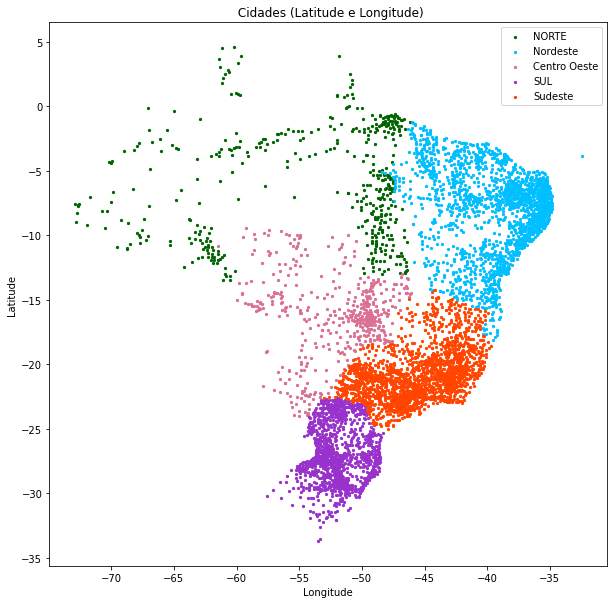

In [559]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## Montado o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#000000')
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')
#plt.scatter(df_brazil[long&lat&~cidadesNordeste]["LONG"], df_brazil[long&lat&~cidadesNordeste]["LAT"], s=1, alpha=1, c = '#4b0082')
plt.legend()
plt.show()

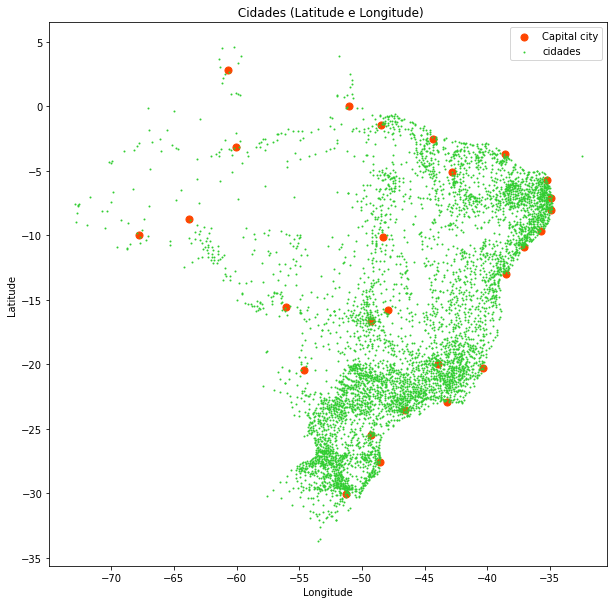

In [560]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
#Montando o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

### **Índice de Desenvolvimento Humano** 

<AxesSubplot:>

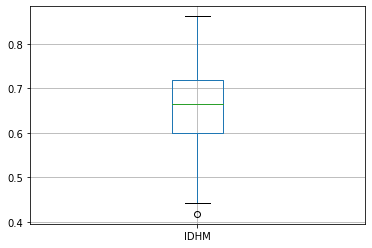

In [561]:
df_brazil.boxplot(column=['IDHM'])

# **Analisando as Regiões** 

## **Norte**

In [562]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = norte.loc[norte['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais


,index,CITY,IBGE_RES_POP,STATE,IDHM,IDHM_dist,REGIAO_TUR,CATEGORIA_TUR
0,3495,Palmas,228332,TO,0.788,Alto,Serras E Lago,A
1,608,Boa Vista,284313,RR,0.752,Alto,"Roraima, A Savana Amazônica",A
2,558,Belém,1393399,PA,0.746,Alto,Belém,A
3,2849,Manaus,1802014,AM,0.737,Alto,Polo Amazônico,A
4,3927,Porto Velho,428527,RO,0.736,Alto,Polo Porto Velho,A
5,2797,Macapá,398204,AP,0.733,Alto,Meio Do Mundo,A
6,4161,Rio Branco,336038,AC,0.727,Alto,Conheça Rio Branco,A


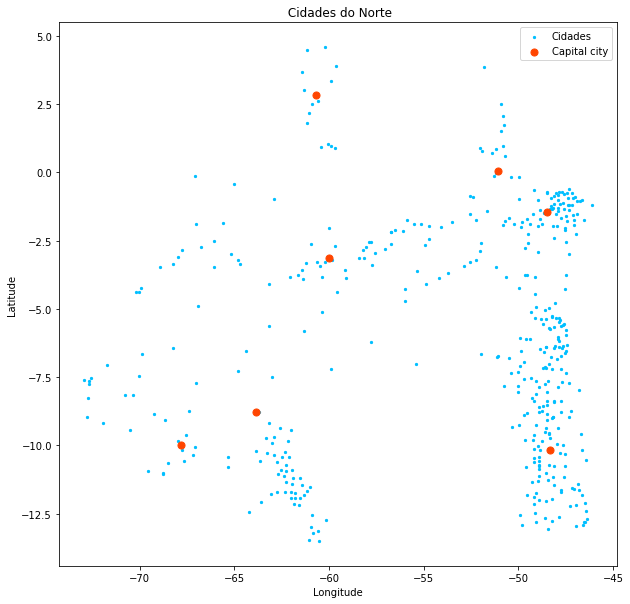

In [563]:
# Mapa do Norte

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNorte = norte['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Norte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNorte]["LONG"], df_brazil[long&lat&capNorte]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

#### Analisando o IDHM da região norte:

In [564]:
norte['IDHM'].var()

0.0036188502724307987

In [565]:
norte['IDHM'].mean()

0.6079510022271716

<AxesSubplot:>

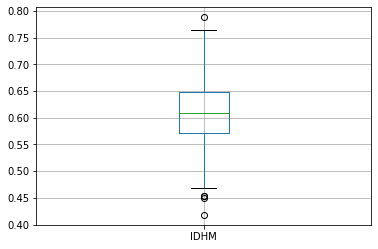

In [566]:
norte.boxplot(column=['IDHM'])

c:\Users\LeydsonMaycksonFerra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


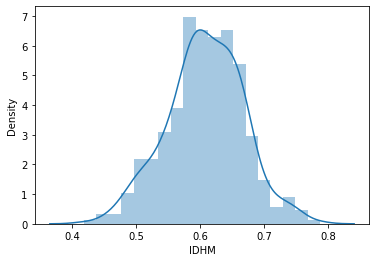

In [567]:
hist=sns.distplot(norte['IDHM'])

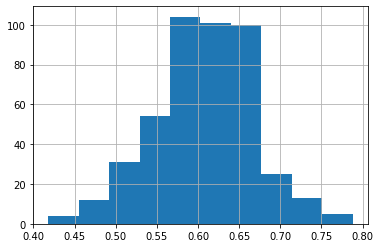

In [568]:
#Histograma do IDHM
hist=norte['IDHM'].hist()

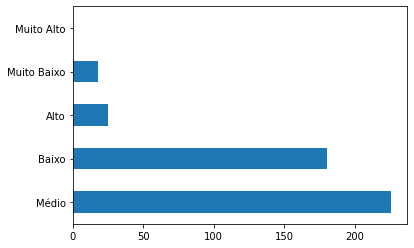

In [569]:
norte['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

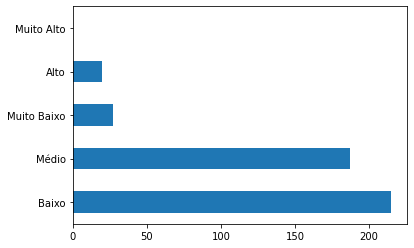

In [570]:
norte['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

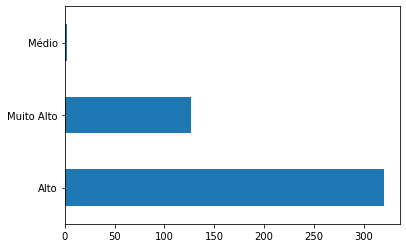

In [571]:
norte['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

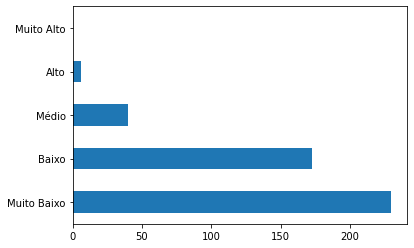

In [572]:
norte['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [573]:
norte.cov()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
IBGE_RES_POP,1.361151e+10,1.359100e+10,2.051269e+07,3.537888e+09,3.473137e+09,6.474988e+07,1.310372e+10,2.236408e+08,8.712881e+08,1.132497e+09,1.252565e+09,8.699939e+09,9.237939e+08,1.118415e+08,1.187764e+09,-4.005150e+07,1.715906e+03,1.970323e+03,5.433466e+02,2.252579e+03,-2.264846e+04,6.358341e+04,-2.441968e+06,1.433109e+09,1.919445e+09,1.018047e+08,1.566561e+10,2.550064e+09,1.214336e+11,1.718430e+11,5.852946e+10,3.543562e+11,6.866162e+10,4.230178e+11,1.523073e+10,1.491677e+08,2.709214e+13,1.740128e+08,5.562767e+05,1.245779e+05,1.061965e+07,5.980228e+04,5.132630e+05,1.005350e+07,7.196639e+07,6.364707e+06,1.064289e+07,3.127674e+06,1.927302e+06,1.779649e+06,1.089547e+07,1.545443e+07,7.657552e+05,7.754577e+06,9.393740e+06,2.030864e+06,9.951731e+06,0.0,3.059435e+04,2.132297e+05,2.043349e+07,5.110956e+05,4.617743e+05,7.562043e+04,5.357413e+04,9.270129e+13,1.348025e+15,2.586475e+09,1.669288e+09,3.999768e+05,1.160637e+04,2.223311e+04,0.0,1.657592e+05
IBGE_RES_POP_BRAS,1.359100e+10,1.357053e+10,2.046935e+07,3.532576e+09,3.467846e+09,6.472943e+07,1.308369e+10,2.232930e+08,8.699390e+08,1.130748e+09,1.250638e+09,8.686655e+09,9.224208e+08,1.118833e+08,1.187795e+09,-3.999267e+07,1.713361e+03,1.967383e+03,5.425854e+02,2.249271e+03,-2.242754e+04,6.352407e+04,-2.439235e+06,1.430789e+09,1.916486e+09,1.016680e+08,1.564178e+10,2.548172e+09,1.212313e+11,1.715764e+11,5.843931e+10,3.537951e+11,6.854875e+10,4.223439e+11,1.520757e+10,1.489878e+08,2.704943e+13,1.737529e+08,5.555652e+05,1.244305e+05,1.060365e+07,5.970398e+04,5.124351e+05,1.003836e+07,7.186006e+07,6.354792e+06,1.062665e+07,3.122858e+06,1.924424e+06,1.777034e+06,1.087884e+07,1.543092e+07,7.645704e+05,7.743352e+06,9.379769e+06,2.027895e+06,9.937024e+06,0.0,3.054276e+04,2.128814e+05,2.040039e+07,5.103080e+05,4.611064e+05,7.551655e+04,5.351916e+04,9.255461e+13,1.345812e+15,2.582423e+09,1.666851e+09,3.993306e+05,1.159027e+04,2.219819e+04,0.0,1.655084e+05
IBGE_RES_POP_ESTR,2.051269e+07,2.046935e+07,4.334181e+04,5.312227e+06,5.291775e+06,2.045148e+04,2.003109e+07,3.478649e+05,1.349084e+06,1.749767e+06,1.926797e+06,1.328446e+07,1.373108e+06,-4.182243e+04,-3.088490e+04,-5.883318e+04,2.544733e+00,2.939731e+00,7.612518e-01,3.308351e+00,-2.209141e+02,5.933703e+01,-2.733190e+03,2.319217e+06,2.958965e+06,1.366573e+05,2.382864e+07,1.892185e+06,2.023598e+08,2.666409e+08,9.015020e+07,5.610431e+08,1.128721e+08,6.739153e+08,2.315931e+07,1.799115e+05,4.270984e+10,2.599601e+05,7.114188e+02,1.474368e+02,1.600478e+04,9.830685e+01,8.279752e+02,1.513998e+04,1.063255e+05,9.914820e+03,1.624018e+04,4.816160e+03,2.877958e+03,2.615209e+03,1.662767e+04,2.350411e+04,1.184817e+03,1.122567e+04,1.397070e+04,2.969369e+03,1.470640e+04,0.0,5.159341e+01,3.482246e+02,3.310411e+04,7.875661e+02,6.679169e+02,1.038845e+02,5.497229e+01,1.466754e+11,2.213398e+12,4.051895e+06,2.437260e+06,6.461862e+02,1.610156e+01,3.492142e+01,0.0,2.508226e+02
IBGE_DU,3.537888e+09,3.532576e+09,5.312227e+06,9.224353e+08,9.065919e+08,1.584320e+07,3.414354e+09,5.810932e+07,2.264554e+08,2.943553e+08,3.256761e+08,2.268434e+09,2.413242e+08,3.045549e+07,2.765400e+08,-1.134220e+07,4.941189e+02,5.640957e+02,1.532531e+02,6.497647e+02,-4.312237e+03,1.344991e+04,-5.559497e+05,3.723786e+08,5.040322e+08,1.846447e+07,4.070054e+09,6.309237e+08,3.141432e+10,4.486495e+10,1.523

<AxesSubplot:xlabel='IDHM', ylabel='COMP_TOT'>

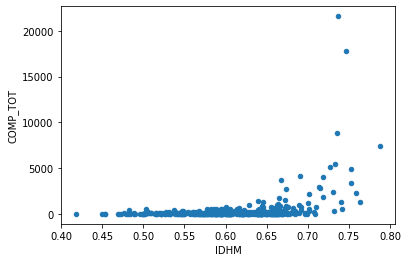

In [574]:
norte.plot.scatter(x='IDHM',y='COMP_TOT')

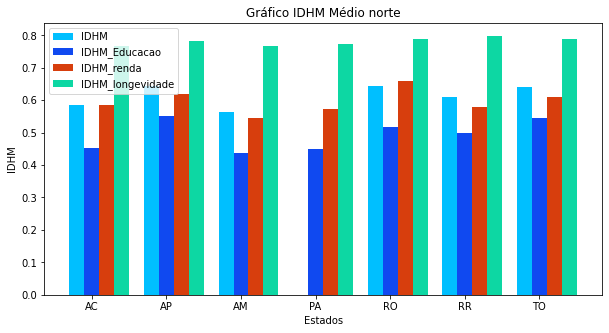

In [575]:
#Comparando os IDHM dos estados do norte
# Criando lista
dados1 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Educacao.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Educacao.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Educacao.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Educacao.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Educacao.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Educacao.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Educacao.mean()}
dados2 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM.mean(),'PA':norte[norte['STATE'] == 'PI'].IDHM.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM.mean()}
dados3 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Renda.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Renda.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Renda.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Renda.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Renda.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Renda.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Renda.mean()}
dados4 =  {'AC':norte[norte['STATE'] == 'AC'].IDHM_Longevidade.mean() ,'AP':norte[norte['STATE'] == 'AP'].IDHM_Longevidade.mean(), 'AM':norte[norte['STATE'] == 'AM'].IDHM_Longevidade.mean(),'PA':norte[norte['STATE'] == 'PA'].IDHM_Longevidade.mean(),'RO':norte[norte['STATE'] == 'RO'].IDHM_Longevidade.mean(),'RR':norte[norte['STATE'] == 'RR'].IDHM_Longevidade.mean(),'TO':norte[norte['STATE'] == 'TO'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio norte")
plt.legend()
plt.show()

In [576]:
# As 10 Melhores cidadesdo Norte deacordo com o IDH para se morar 
norte.loc[(norte['IDHM'] >= 0.650) & (norte['REGIAO_TUR'] != '0')][['CITY','STATE','IDHM','REGIAO_TUR','CATEGORIA_TUR', 'RURAL_URBAN']].sort_values('IDHM', ascending=False).head(10).reset_index()

,index,CITY,STATE,IDHM,REGIAO_TUR,CATEGORIA_TUR,RURAL_URBAN
0,3495,Palmas,TO,0.788,Serras E Lago,A,Urbano
1,3572,Paraíso Do Tocantins,TO,0.764,Serras E Lago,C,Urbano
2,2014,Gurupi,TO,0.759,Ilha Do Bananal,C,Urbano
3,275,Araguaína,TO,0.752,Vale Dos Grandes Rios,B,Urbano
4,608,Boa Vista,RR,0.752,"Roraima, A Savana Amazônica",A,Urbano
5,558,Belém,PA,0.746,Belém,A,Urbano
6,1987,Guaraí,TO,0.741,Vale Dos Grandes Rios,C,Urbano
7,3920,Porto Nacional,TO,0.740,Serras E Lago,C,Urbano
8,2849,Manaus,AM,0.737,Polo Amazônico,A,Urbano
9,3927,Porto Velho,RO,0.736,Polo Porto Velho,A,Urbano


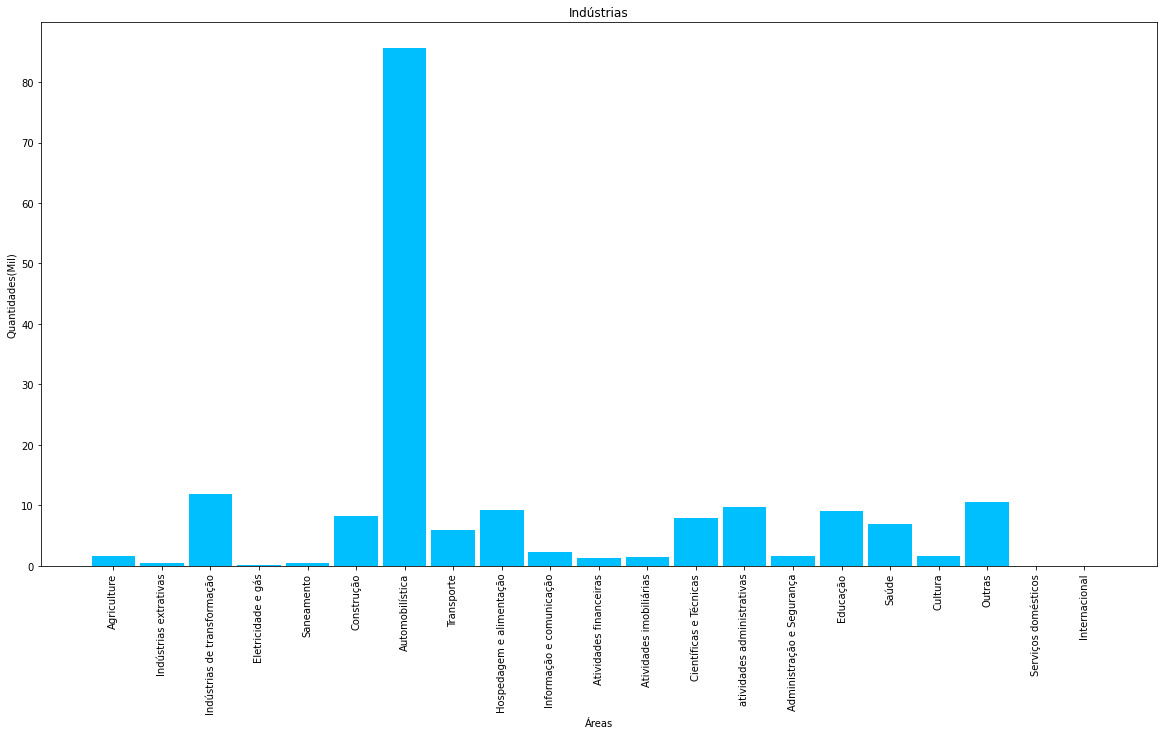

In [577]:
# Criando Principais tipos de Industria no norte
dados =  {'Agriculture':norte.COMP_A.sum()/1000,'Indústrias extrativas':norte.COMP_B.sum()/1000,'Indústrias de transformação':norte.COMP_C.sum()/1000,'Eletricidade e gás':norte.COMP_D.sum()/1000,'Saneamento':norte.COMP_E.sum()/1000,'Construção':norte.COMP_F.sum()/1000,'Automobilística':norte.COMP_G.sum()/1000,'Transporte':norte.COMP_H.sum()/1000,'Hospedagem e alimentação':norte.COMP_I.sum()/1000,'Informação e comunicação':norte.COMP_J.sum()/1000,'Atividades financeiras':norte.COMP_K.sum()/1000,'Atividades imobiliárias':norte.COMP_L.sum()/1000,'Científicas e Técnicas':norte.COMP_M.sum()/1000,'atividades administrativas':norte.COMP_N.sum()/1000,'Administração e Segurança':norte.COMP_O.sum()/1000,'Educação':norte.COMP_P.sum()/1000,'Saúde':norte.COMP_Q.sum()/1000,'Cultura':norte.COMP_R.sum()/1000,'Outras':norte.COMP_S.sum()/1000,'Serviços domésticos':norte.COMP_T.sum()/1000,'Internacional':norte.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [578]:
DadosNorte = [{'Capitais':norte.loc[(norte['CAPITAL'] == 1)]['CITY'].count(),'Cidades': norte['CITY'].count(),'Habitantes': norte['IBGE_RES_POP'].sum(), 'Empresas': norte['COMP_TOT'].sum(),'IDH': norte['IDHM'].mean(),'PIP': norte['GDP'].mean()}]
df_DadosNorte = pd.DataFrame(DadosNorte)
df_DadosNorte

,Capitais,Cidades,Habitantes,Empresas,IDH,PIP
0,7,449,15864454,176417,0.607951,750725.347439


## **Nordeste**

In [579]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = nordeste.loc[nordeste['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

,index,CITY,IBGE_RES_POP,STATE,IDHM,IDHM_dist,REGIAO_TUR,CATEGORIA_TUR
0,4078,Recife,1537704,PE,0.772,Alto,História E Mar,A
1,256,Aracaju,571149,SE,0.770,Alto,Polo Costa Dos Coqueirais,A
2,4959,São Luís,1014837,MA,0.768,Alto,Polo São Luís,A
3,2580,João Pessoa,723515,PB,0.763,Alto,Costa Das Piscinas,A
4,3206,Natal,803739,RN,0.763,Alto,Polo Costa Das Dunas,A
5,4300,Salvador,2675656,BA,0.759,Alto,Baía De Todos Os Santos,A
6,1793,Fortaleza,2452185,CE,0.754,Alto,Fortaleza,A
7,5179,Teresina,814230,PI,0.751,Alto,Polo Teresina,A
8,2806,Maceió,932748,AL,0.721,Alto,Grande Maceió,A


In [580]:
nordeste['IDHM'].var()

0.001873631535342885

In [581]:
nordeste['IDHM'].mean()

0.5907003348214285

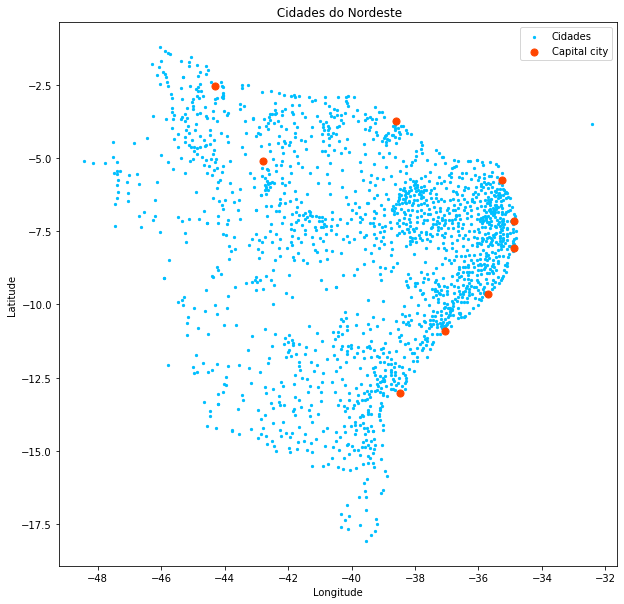

In [582]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNordestete = nordeste['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Nordeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNordestete]["LONG"], df_brazil[long&lat&capNordestete]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

c:\Users\LeydsonMaycksonFerra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


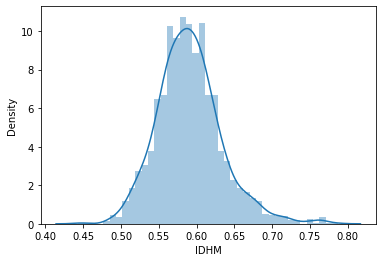

In [583]:
hist=sns.distplot(nordeste['IDHM'])

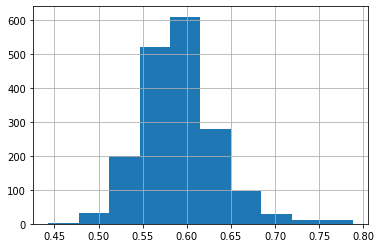

In [584]:
hist=nordeste['IDHM'].hist()

<AxesSubplot:>

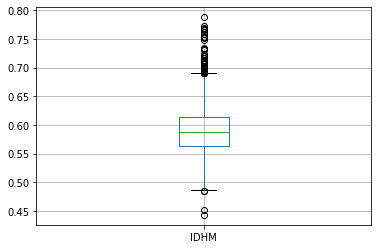

In [585]:
nordeste.boxplot(column=['IDHM'])

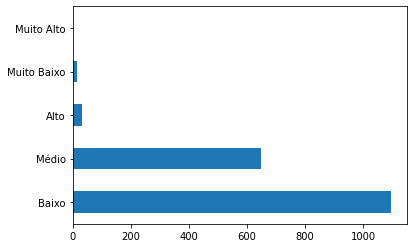

In [586]:
nordeste['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

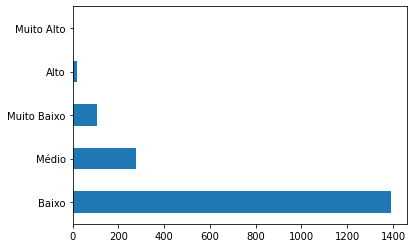

In [587]:
nordeste['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

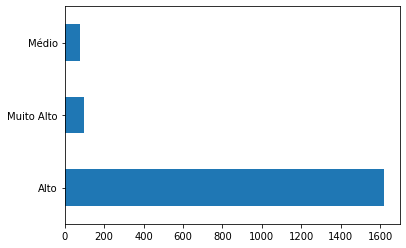

In [588]:
nordeste['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

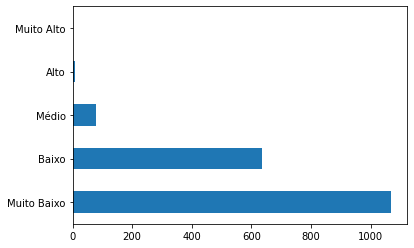

In [589]:
nordeste['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [590]:
nordeste.cov()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
IBGE_RES_POP,1.205978e+10,1.204461e+10,1.517706e+07,3.635449e+09,3.596059e+09,3.938917e+07,1.021238e+10,1.341221e+08,5.390451e+08,7.099020e+08,8.263693e+08,6.986687e+09,1.016256e+09,4.335984e+07,3.959875e+08,-4.052265e+07,1.789003e+03,2.032753e+03,8.085594e+02,2.220745e+03,1.345851e+04,-9.552547e+02,-2.302018e+06,9.235695e+08,2.345635e+09,5.561156e+06,1.298708e+10,6.838405e+08,4.425050e+10,1.715844e+11,4.112589e+10,2.576447e+11,4.157972e+10,2.992244e+11,1.303859e+10,1.575688e+08,2.540269e+13,2.655372e+08,6.024590e+05,1.769279e+05,1.741177e+07,1.820760e+05,4.835064e+05,1.410569e+07,9.619476e+07,7.098317e+06,1.816947e+07,5.654765e+06,3.954919e+06,5.112563e+06,1.753924e+07,3.263724e+07,5.130890e+05,1.090260e+07,1.494128e+07,3.868545e+06,1.597635e+07,0.0,1.167915e+04,1.170763e+05,1.306770e+07,5.840332e+05,4.954672e+05,7.884481e+04,4.209198e+04,2.020394e+14,9.740683e+14,2.797060e+09,1.310816e+09,7.159226e+05,8.491847e+03,6.367539e+04,6.953393e+04,2.000643e+05
IBGE_RES_POP_BRAS,1.204461e+10,1.202945e+10,1.515446e+07,3.630799e+09,3.591409e+09,3.938939e+07,1.019980e+10,1.339621e+08,5.384018e+08,7.090523e+08,8.253767e+08,6.978028e+09,1.014974e+09,4.337412e+07,3.959236e+08,-4.048092e+07,1.787181e+03,2.030570e+03,8.077331e+02,2.218577e+03,1.343619e+04,-9.406649e+02,-2.299066e+06,9.223386e+08,2.342438e+09,5.563445e+06,1.297075e+10,6.835355e+08,4.419534e+10,1.713595e+11,4.107487e+10,2.573132e+11,4.152661e+10,2.988398e+11,1.302214e+10,1.573987e+08,2.537052e+13,2.651921e+08,6.017841e+05,1.767427e+05,1.739069e+07,1.818112e+05,4.829382e+05,1.408705e+07,9.607475e+07,7.089230e+06,1.814525e+07,5.647140e+06,3.949436e+06,5.105521e+06,1.751508e+07,3.259182e+07,5.124641e+05,1.088845e+07,1.492132e+07,3.863398e+06,1.595557e+07,0.0,1.166077e+04,1.169138e+05,1.304975e+07,5.832170e+05,4.948321e+05,7.875143e+04,4.205971e+04,2.017354e+14,9.727819e+14,2.793457e+09,1.309395e+09,7.149449e+05,8.482933e+03,6.358785e+04,6.943304e+04,1.998086e+05
IBGE_RES_POP_ESTR,1.517706e+07,1.515446e+07,2.259300e+04,4.650056e+06,4.650273e+06,-2.174456e+02,1.258651e+07,1.600276e+05,6.432491e+05,8.497223e+05,9.925215e+05,8.658572e+06,1.282422e+06,-1.427648e+04,6.386493e+04,-4.173205e+04,1.821537e+00,2.183022e+00,8.263318e-01,2.168263e+00,2.232150e+01,-1.458980e+01,-2.952656e+03,1.230966e+06,3.197037e+06,-2.288887e+03,1.632704e+07,3.049743e+05,5.516141e+07,2.249433e+08,5.102415e+07,3.314338e+08,5.310380e+07,3.845376e+08,1.644639e+07,1.700939e+05,3.217378e+10,3.451472e+05,6.748582e+02,1.851958e+02,2.108276e+04,2.647782e+02,5.681521e+02,1.864018e+04,1.200087e+05,9.086296e+03,2.422213e+04,7.624869e+03,5.482748e+03,7.041727e+03,2.415711e+04,4.542128e+04,6.248245e+02,1.415362e+04,1.996662e+04,5.147429e+03,2.077553e+04,0.0,1.838413e+01,1.625093e+02,1.794378e+04,8.161933e+02,6.351365e+02,9.338467e+01,3.226939e+01,3.039949e+11,1.286436e+12,3.603376e+06,1.421404e+06,9.777074e+02,8.913866e+00,8.753939e+01,1.008853e+02,2.557047e+02
IBGE_DU,3.635449e+09,3.630799e+09,4.650056e+06,1.099602e+09,1.089093e+09,1.050909e+07,3.062034e+09,4.001051e+07,1.607991e+08,2.119322e+08,2.467395e+08,2.096804e+09,3.057490e+08,1.021550e+07,1.035791e+08,-1.203976e+07,5.318828e+02,6.087148e+02,2.411159e+02,6.556288e+02,4.778404e+03,-1.238596e+03,-6.586535e+05,2.795023e+08,7.149653e+08,1.292761e+06,3.913776e+09,1.907059e+08,1.3

<AxesSubplot:xlabel='IDHM', ylabel='COMP_TOT'>

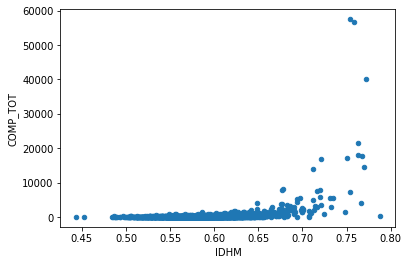

In [591]:
nordeste.plot.scatter(x='IDHM',y='COMP_TOT')

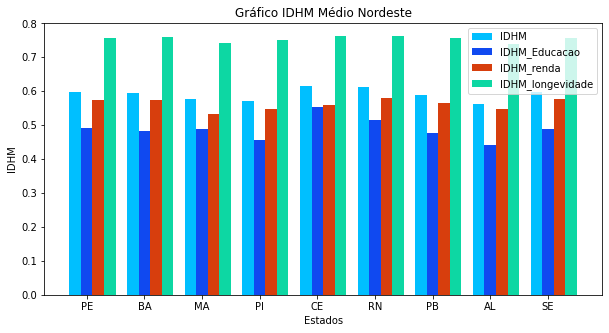

In [592]:
# Criando lista
dados1 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Educacao.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Educacao.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Educacao.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Educacao.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Educacao.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Educacao.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Educacao.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Educacao.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Educacao.mean()}
dados2 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
dados3 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Renda.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Renda.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Renda.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Renda.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Renda.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Renda.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Renda.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Renda.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Renda.mean()}
dados4 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Longevidade.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Longevidade.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Longevidade.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Longevidade.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Longevidade.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Longevidade.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Longevidade.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Longevidade.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Nordeste")
plt.legend()
plt.show()
plt.show()


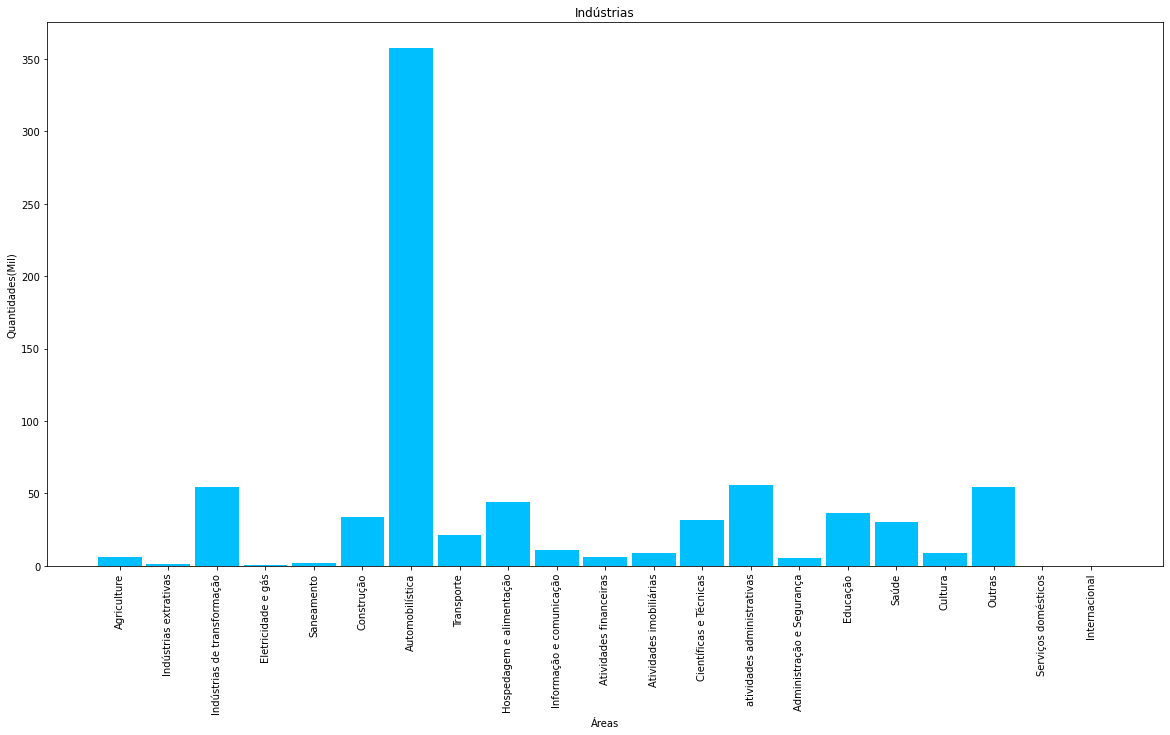

In [593]:
# Criando Principais tipos de Industria no nordeste
dados =  {'Agriculture':nordeste.COMP_A.sum()/1000,'Indústrias extrativas':nordeste.COMP_B.sum()/1000,'Indústrias de transformação':nordeste.COMP_C.sum()/1000,'Eletricidade e gás':nordeste.COMP_D.sum()/1000,'Saneamento':nordeste.COMP_E.sum()/1000,'Construção':nordeste.COMP_F.sum()/1000,'Automobilística':nordeste.COMP_G.sum()/1000,'Transporte':nordeste.COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste.COMP_I.sum()/1000,'Informação e comunicação':nordeste.COMP_J.sum()/1000,'Atividades financeiras':nordeste.COMP_K.sum()/1000,'Atividades imobiliárias':nordeste.COMP_L.sum()/1000,'Científicas e Técnicas':nordeste.COMP_M.sum()/1000,'atividades administrativas':nordeste.COMP_N.sum()/1000,'Administração e Segurança':nordeste.COMP_O.sum()/1000,'Educação':nordeste.COMP_P.sum()/1000,'Saúde':nordeste.COMP_Q.sum()/1000,'Cultura':nordeste.COMP_R.sum()/1000,'Outras':nordeste.COMP_S.sum()/1000,'Serviços domésticos':nordeste.COMP_T.sum()/1000,'Internacional':nordeste.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [594]:
Dadosnordeste = [{'Capitais':nordeste.loc[(nordeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': nordeste['CITY'].count(),'Habitantes': nordeste['IBGE_RES_POP'].sum(), 'Empresas': nordeste['COMP_TOT'].sum(),'IDH': nordeste['IDHM'].mean(),'PIP': nordeste['GDP'].mean()}]
df_Dadosnordeste = pd.DataFrame(Dadosnordeste)
df_Dadosnordeste

,Capitais,Cidades,Habitantes,Empresas,IDH,PIP
0,9,1792,53062072,771290,0.5907,501086.897321


# **Sul**

In [595]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = sul.loc[sul['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

,index,CITY,IBGE_RES_POP,STATE,IDHM,IDHM_dist,REGIAO_TUR,CATEGORIA_TUR
0,1773,Florianópolis,421240,SC,0.847,Muito Alto,Grande Florianópolis,A
1,1458,Curitiba,1751907,PR,0.823,Muito Alto,Rotas Do Pinhão,A
2,3897,Porto Alegre,1409351,RS,0.805,Muito Alto,Porto Alegre,A


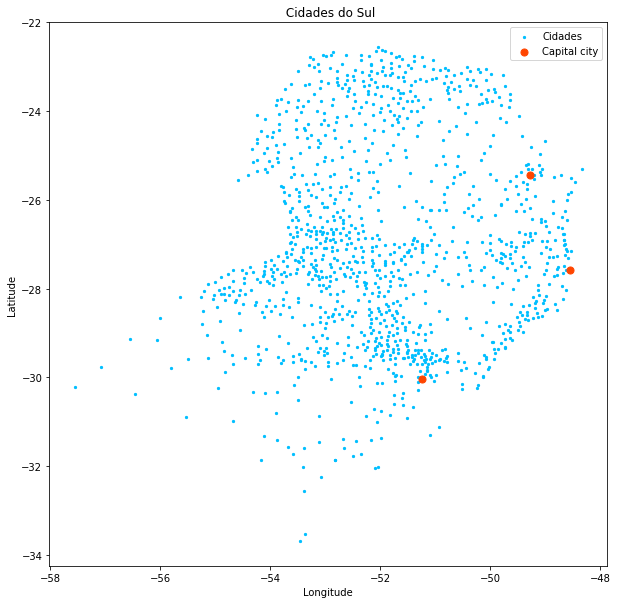

In [596]:
# Mapa do Sul

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capSul = sul['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Sul")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capSul]["LONG"], df_brazil[long&lat&capSul]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [597]:
sul['IDHM'].var()

0.001729992321416921

In [598]:
sul['IDHM'].mean()

0.7141127946127946

c:\Users\LeydsonMaycksonFerra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


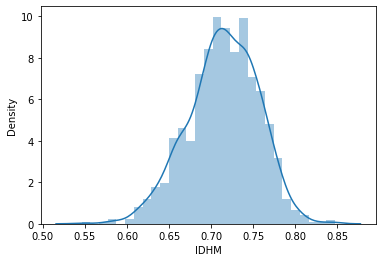

In [599]:
hist=sns.distplot(sul['IDHM'])

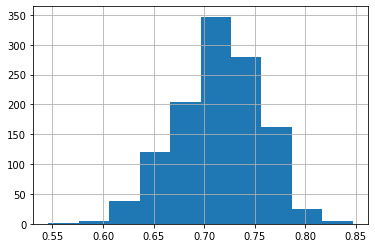

In [600]:
hist=sul['IDHM'].hist()

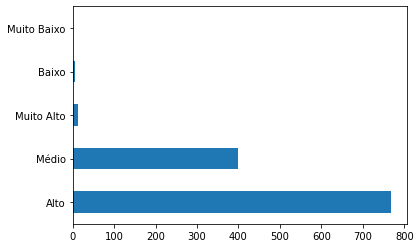

In [601]:
sul['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

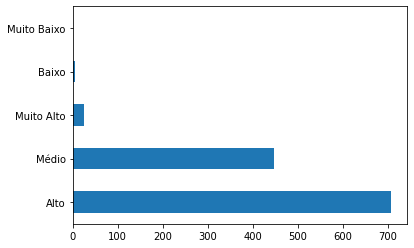

In [602]:
sul['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

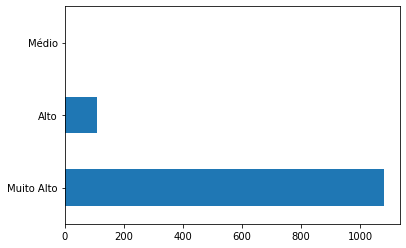

In [603]:
sul['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

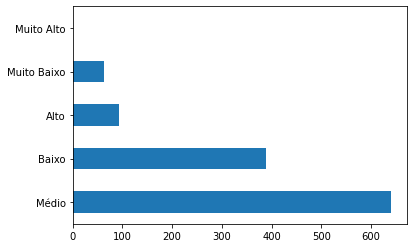

In [604]:
sul['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [605]:
sul.cov()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
IBGE_RES_POP,6.277814e+09,6.251957e+09,2.585692e+07,2.108280e+09,2.088410e+09,1.987042e+07,5.947269e+09,7.404733e+07,2.867172e+08,3.802625e+08,4.461844e+08,4.036399e+09,7.236587e+08,1.703372e+08,8.794337e+08,-1.617257e+07,8.475500e+02,9.740947e+02,3.175039e+02,1.125567e+03,1.508090e+04,-5.217421e+03,-8.701400e+05,1.189485e+09,2.841870e+09,8.108759e+06,6.849060e+09,8.785198e+08,4.789742e+10,1.677113e+11,3.067423e+10,2.471615e+11,4.967370e+10,2.968352e+11,6.765850e+09,1.067996e+08,2.018491e+13,3.359583e+08,9.119813e+05,1.498255e+05,2.261400e+07,2.920372e+05,5.512583e+05,1.990812e+07,1.081453e+08,1.310001e+07,1.912297e+07,1.316775e+07,9.322915e+06,8.288530e+06,2.864859e+07,4.757961e+07,2.865279e+05,9.583699e+06,1.342327e+07,4.735534e+06,1.610372e+07,0.0,2.265393e+04,8.679452e+04,1.277523e+07,7.343824e+05,4.770620e+05,9.375483e+04,2.585968e+04,4.505274e+14,9.362664e+14,3.217181e+09,6.761088e+08,3.425235e+06,7.006228e+03,6.410592e+04,4.478228e+04,1.928424e+05
IBGE_RES_POP_BRAS,6.251957e+09,6.226259e+09,2.569802e+07,2.099560e+09,2.079722e+09,1.983827e+07,5.922596e+09,7.374150e+07,2.855378e+08,3.787011e+08,4.443556e+08,4.019624e+09,7.206356e+08,1.700058e+08,8.780414e+08,-1.612098e+07,8.446041e+02,9.706673e+02,3.166279e+02,1.121490e+03,1.506756e+04,-5.189773e+03,-8.638055e+05,1.184341e+09,2.829427e+09,8.071250e+06,6.821005e+09,8.767616e+08,4.769674e+10,1.669982e+11,3.054656e+10,2.461182e+11,4.946551e+10,2.955837e+11,6.738054e+09,1.063973e+08,2.009980e+13,3.345235e+08,9.084796e+05,1.493138e+05,2.253193e+07,2.905029e+05,5.490502e+05,1.982433e+07,1.076895e+08,1.304792e+07,1.903742e+07,1.310821e+07,9.281592e+06,8.252321e+06,2.852123e+07,4.736921e+07,2.851537e+05,9.542146e+06,1.336437e+07,4.715056e+06,1.603321e+07,0.0,2.253460e+04,8.629925e+04,1.270732e+07,7.311246e+05,4.750548e+05,9.338282e+04,2.578669e+04,4.485659e+14,9.322469e+14,3.203465e+09,6.734006e+08,3.412027e+06,6.978762e+03,6.382030e+04,4.458213e+04,1.920403e+05
IBGE_RES_POP_ESTR,2.585692e+07,2.569802e+07,1.588990e+05,8.719772e+06,8.687619e+06,3.215580e+04,2.467299e+07,3.058346e+05,1.179381e+06,1.561403e+06,1.828765e+06,1.677444e+07,3.023170e+06,3.313706e+05,1.392297e+06,-5.159022e+04,2.945909e+00,3.427388e+00,8.759774e-01,4.076685e+00,1.334001e+01,-2.764801e+01,-6.334451e+03,5.143839e+06,1.244332e+07,3.750987e+04,2.805485e+07,1.758152e+06,2.006819e+08,7.131740e+08,1.276692e+08,1.043283e+09,2.081939e+08,1.251477e+09,2.779627e+07,4.023145e+05,8.510919e+10,1.434857e+06,3.501620e+03,5.116973e+02,8.207069e+04,1.534300e+03,2.208176e+03,8.378807e+04,4.558312e+05,5.209028e+04,8.555168e+04,5.954693e+04,4.132322e+04,3.620869e+04,1.273543e+05,2.104015e+05,1.374199e+03,4.155287e+04,5.889795e+04,2.047815e+04,7.051237e+04,0.0,1.193292e+02,4.952727e+02,6.791364e+04,3.257815e+03,2.007207e+03,3.720049e+02,7.298854e+01,1.961478e+12,4.019550e+12,1.371526e+07,2.708126e+06,1.320823e+04,2.746628e+01,2.856238e+02,2.001452e+02,8.020800e+02
IBGE_DU,2.108280e+09,2.099560e+09,8.719772e+06,7.100354e+08,7.036779e+08,6.357675e+06,1.998262e+09,2.477705e+07,9.590481e+07,1.272714e+08,1.493903e+08,1.355656e+09,2.452627e+08,5.442730e+07,2.814564e+08,-5.375650e+06,2.828152e+02,3.283804e+02,1.046022e+02,3.738333e+02,4.760170e+03,-2.145728e+03,-3.413941e+05,4.045884e+08,9.578904e+08,2.633416e+06,2.297525e+09,2.808742e+08,1.5815

<AxesSubplot:xlabel='IDHM', ylabel='COMP_TOT'>

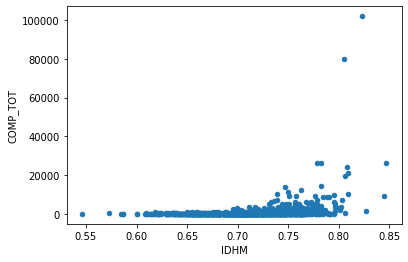

In [606]:
sul.plot.scatter(x='IDHM',y='COMP_TOT')

<AxesSubplot:>

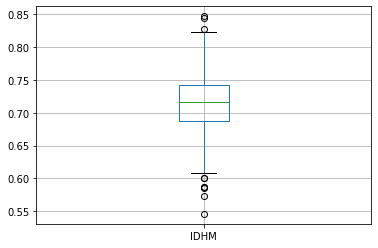

In [607]:
sul.boxplot(column=['IDHM'])

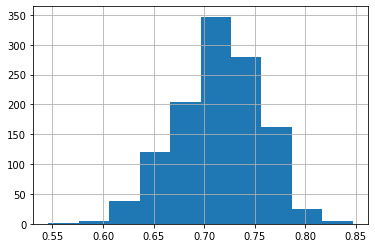

In [608]:
#Histograma do IDHM
histSUL=sul['IDHM'].hist()

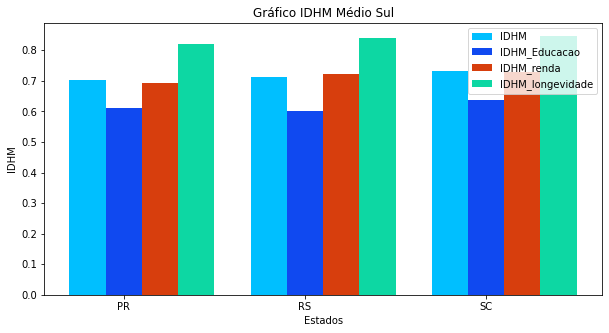

In [609]:
# Criando lista
dados1 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Educacao.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Educacao.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Educacao.mean()}
dados2 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM.mean()}
dados3 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Renda.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Renda.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Renda.mean()}
dados4 =  {'PR':sul[sul['STATE'] == 'PR'].IDHM_Longevidade.mean() ,'RS':sul[sul['STATE'] == 'RS'].IDHM_Longevidade.mean(), 'SC':sul[sul['STATE'] == 'SC'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Sul")
plt.legend()
plt.show()


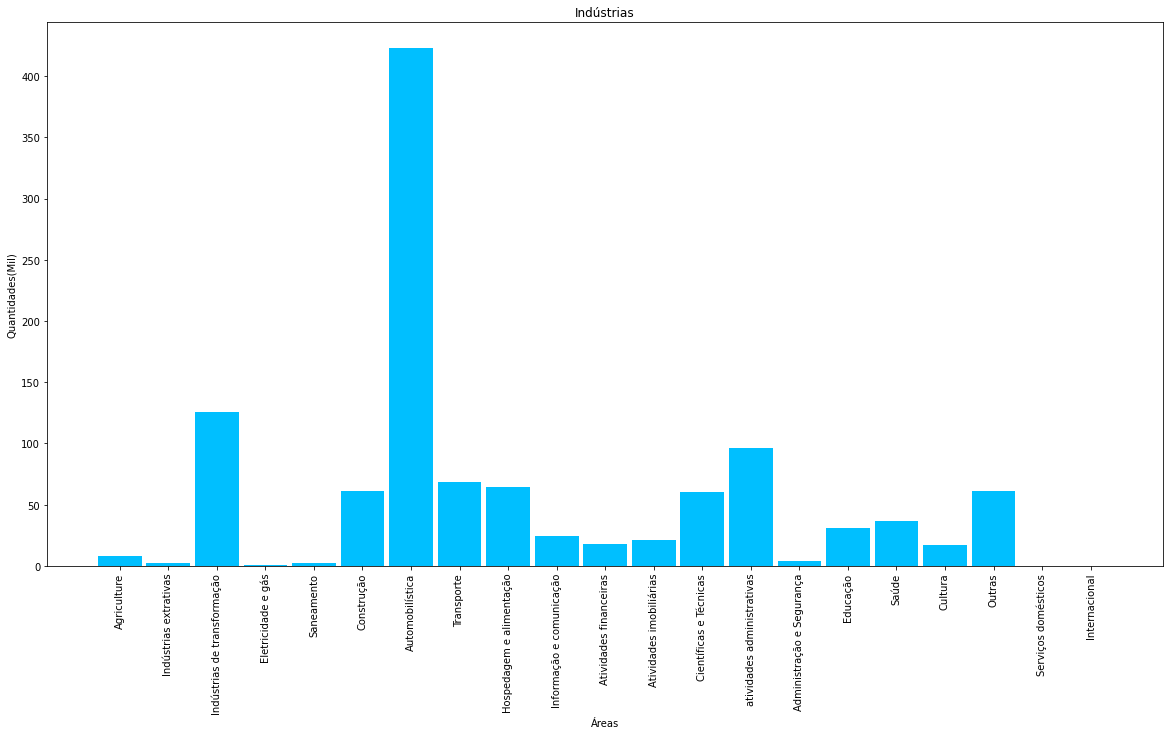

In [610]:
# Criando Principais tipos de Industria no sul
dados =  {'Agriculture':sul.COMP_A.sum()/1000,'Indústrias extrativas':sul.COMP_B.sum()/1000,'Indústrias de transformação':sul.COMP_C.sum()/1000,'Eletricidade e gás':sul.COMP_D.sum()/1000,'Saneamento':sul.COMP_E.sum()/1000,'Construção':sul.COMP_F.sum()/1000,'Automobilística':sul.COMP_G.sum()/1000,'Transporte':sul.COMP_H.sum()/1000,'Hospedagem e alimentação':sul.COMP_I.sum()/1000,'Informação e comunicação':sul.COMP_J.sum()/1000,'Atividades financeiras':sul.COMP_K.sum()/1000,'Atividades imobiliárias':sul.COMP_L.sum()/1000,'Científicas e Técnicas':sul.COMP_M.sum()/1000,'atividades administrativas':sul.COMP_N.sum()/1000,'Administração e Segurança':sul.COMP_O.sum()/1000,'Educação':sul.COMP_P.sum()/1000,'Saúde':sul.COMP_Q.sum()/1000,'Cultura':sul.COMP_R.sum()/1000,'Outras':sul.COMP_S.sum()/1000,'Serviços domésticos':sul.COMP_T.sum()/1000,'Internacional':sul.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [611]:
Dadosnordeste = [{'Capitais':sul.loc[(sul['CAPITAL'] == 1)]['CITY'].count(),'Cidades': sul['CITY'].count(),'Habitantes': sul['IBGE_RES_POP'].sum(), 'Empresas': sul['COMP_TOT'].sum(),'IDH': sul['IDHM'].mean(),'PIP': sul['GDP'].mean()}]
df_Dadosnordeste = pd.DataFrame(Dadosnordeste)
df_Dadosnordeste

,Capitais,Cidades,Habitantes,Empresas,IDH,PIP
0,3,1188,27386891,1126447,0.714113,897825.175926


# **Suldeste**

In [612]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = suldeste.loc[suldeste['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

,index,CITY,IBGE_RES_POP,STATE,IDHM,IDHM_dist,REGIAO_TUR,CATEGORIA_TUR
0,5491,Vitória,327801,ES,0.845,Muito Alto,Metropolitana,A
1,550,Belo Horizonte,2375151,MG,0.810,Muito Alto,Belo Horizonte,A
2,4997,São Paulo,11253503,SP,0.805,Muito Alto,Capital,A
3,4175,Rio De Janeiro,6320446,RJ,0.799,Alto,Metropolitana,A


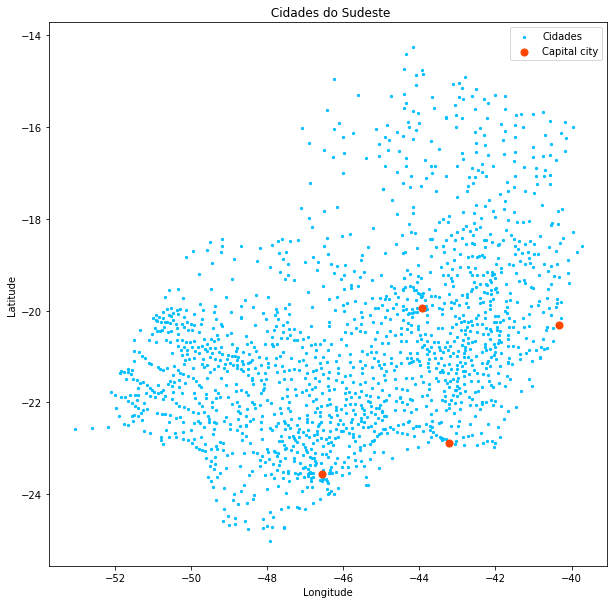

In [613]:
# Mapa do Sul

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capSuldest = suldeste['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Sudeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capSuldest]["LONG"], df_brazil[long&lat&capSuldest]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [614]:
suldeste['IDHM'].var()

0.0029462852997745774

In [615]:
suldeste['IDHM'].mean()

0.698984412470024

c:\Users\LeydsonMaycksonFerra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


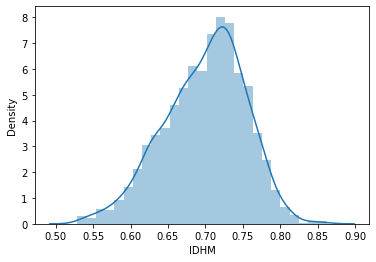

In [616]:
hist=sns.distplot(suldeste['IDHM'])

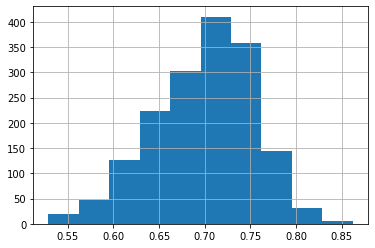

In [617]:
hist=suldeste['IDHM'].hist()

<AxesSubplot:>

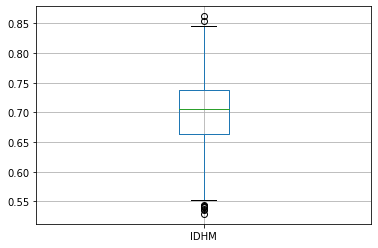

In [618]:
suldeste.boxplot(column=['IDHM'])

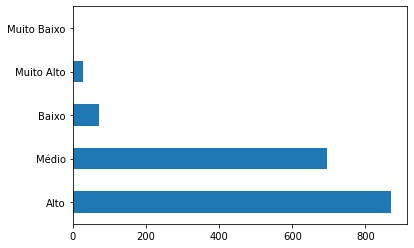

In [619]:
suldeste['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

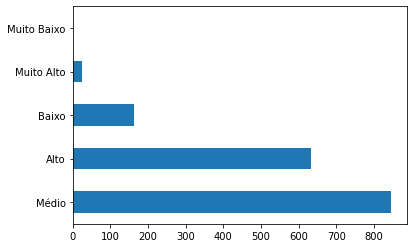

In [620]:
suldeste['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

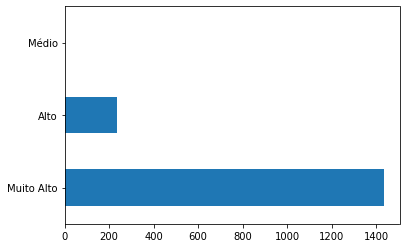

In [621]:
suldeste['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

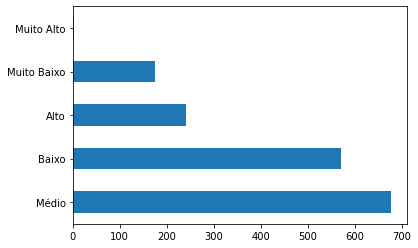

In [622]:
suldeste['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [623]:
suldeste.cov()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
IBGE_RES_POP,1.105297e+11,1.094831e+11,1.046566e+09,3.561664e+10,3.541697e+10,1.996639e+08,1.012010e+11,1.220049e+09,4.858526e+09,6.499537e+09,7.521512e+09,6.792670e+10,1.317471e+10,-6.767303e+06,-4.325666e+07,-5.762938e+07,2.916985e+03,3.742196e+03,7.973138e+02,3.738077e+03,1.017344e+04,-6.080279e+04,-2.331881e+06,2.036918e+10,5.035711e+10,1.441019e+07,1.190834e+11,8.598960e+08,6.456457e+11,4.049606e+12,5.129430e+11,5.209055e+12,1.113346e+12,6.322401e+12,1.172740e+11,6.815540e+08,4.266668e+14,4.645097e+09,6.143163e+06,1.857818e+06,2.613115e+08,3.271237e+06,6.186616e+06,2.192481e+08,1.312440e+09,1.639320e+08,2.671744e+08,3.063245e+08,1.919318e+08,1.183982e+08,4.324538e+08,6.966592e+08,1.649959e+06,1.455521e+08,2.015459e+08,6.860110e+07,2.398482e+08,0.0,5.673165e+05,8.106756e+05,1.291329e+08,1.542774e+07,5.804627e+06,7.975344e+05,9.767665e+04,1.423119e+17,2.457808e+16,5.124718e+10,1.021343e+10,2.530876e+07,1.792552e+04,1.217954e+06,6.064738e+04,2.168234e+06
IBGE_RES_POP_BRAS,1.094831e+11,1.084471e+11,1.035995e+09,3.527947e+10,3.508174e+10,1.977350e+08,1.002429e+11,1.208479e+09,4.812479e+09,6.438034e+09,7.450548e+09,6.728365e+10,1.304971e+10,-5.744855e+06,-3.797160e+07,-5.732220e+07,2.900225e+03,3.718370e+03,7.932732e+02,3.718022e+03,1.017449e+04,-6.038336e+04,-2.321488e+06,2.017427e+10,4.986727e+10,1.432288e+07,1.179559e+11,8.577927e+08,6.396657e+11,4.009587e+12,5.082214e+11,5.158331e+12,1.102472e+12,6.260803e+12,1.161631e+11,6.770035e+08,4.225019e+14,4.599693e+09,6.087439e+06,1.842604e+06,2.587620e+08,3.239230e+06,6.128420e+06,2.171236e+08,1.299728e+09,1.623265e+08,2.645947e+08,3.032074e+08,1.899937e+08,1.172276e+08,4.282001e+08,6.898339e+08,1.634709e+06,1.441430e+08,1.995781e+08,6.794060e+07,2.375396e+08,0.0,5.615464e+05,8.032433e+05,1.279389e+08,1.527622e+07,5.748312e+06,7.902226e+05,9.695976e+04,1.408301e+17,2.433426e+16,5.075352e+10,1.011684e+10,2.505685e+07,1.780323e+04,1.206086e+06,6.008374e+04,2.147701e+06
IBGE_RES_POP_ESTR,1.046566e+09,1.035995e+09,1.057083e+07,3.371640e+08,3.352351e+08,1.928909e+06,9.581428e+08,1.157025e+07,4.604767e+07,6.150278e+07,7.096339e+07,6.430511e+08,1.250077e+08,-1.022449e+06,-5.285057e+06,-3.071733e+05,1.676000e+01,2.382617e+01,4.040604e+00,2.005458e+01,-1.050380e+00,-4.194292e+02,-1.039269e+04,1.949115e+08,4.898391e+08,8.730209e+04,1.127534e+09,2.103310e+06,5.980035e+09,4.001982e+10,4.721612e+09,5.072357e+10,1.087412e+10,6.159768e+10,1.110854e+09,4.550539e+06,4.164913e+12,4.540398e+07,5.572385e+04,1.521366e+04,2.549550e+06,3.200665e+04,5.819539e+04,2.124571e+06,1.271162e+07,1.605517e+06,2.579753e+06,3.117128e+06,1.938050e+06,1.170621e+06,4.253770e+06,6.825285e+06,1.525025e+04,1.409049e+06,1.967814e+06,6.604973e+05,2.308592e+06,0.0,5.770096e+03,7.432338e+03,1.193988e+06,1.515267e+05,5.631503e+04,7.311837e+03,7.168897e+02,1.481874e+15,2.438197e+14,4.936634e+08,9.659000e+07,2.519116e+05,1.222928e+02,1.186786e+04,5.636330e+02,2.053266e+04
IBGE_DU,3.561664e+10,3.527947e+10,3.371640e+08,1.148850e+10,1.142527e+10,6.323084e+07,3.258260e+10,3.920972e+08,1.561421e+09,2.089325e+09,2.418768e+09,2.186256e+10,4.258436e+09,-1.017693e+06,-6.421919e+06,-1.839986e+07,9.340922e+02,1.205705e+03,2.542526e+02,1.191537e+03,3.280179e+03,-1.941094e+04,-8.195224e+05,6.576994e+09,1.620070e+10,4.579595e+06,3.835991e+10,2.776965e+

<AxesSubplot:xlabel='IDHM', ylabel='COMP_TOT'>

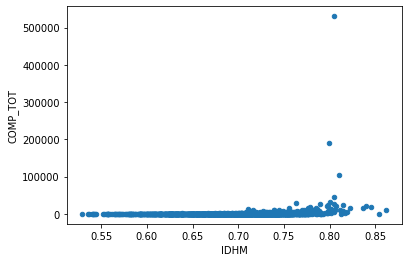

In [624]:
suldeste.plot.scatter(x='IDHM',y='COMP_TOT')

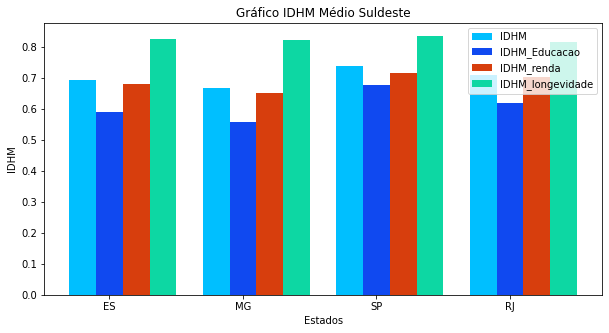

In [625]:
# Criando lista
dados1 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM_Educacao.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM_Educacao.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM_Educacao.mean(), 'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM_Educacao.mean()}
dados2 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM.mean(),'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM.mean()}
dados3 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM_Renda.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM_Renda.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM_Renda.mean(),'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM_Renda.mean()}
dados4 =  {'ES':suldeste[suldeste['STATE'] == 'ES'].IDHM_Longevidade.mean() ,'MG':suldeste[suldeste['STATE'] == 'MG'].IDHM_Longevidade.mean(), 'SP':suldeste[suldeste['STATE'] == 'SP'].IDHM_Longevidade.mean(),'RJ':suldeste[suldeste['STATE'] == 'RJ'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Suldeste")
plt.legend()
plt.show()


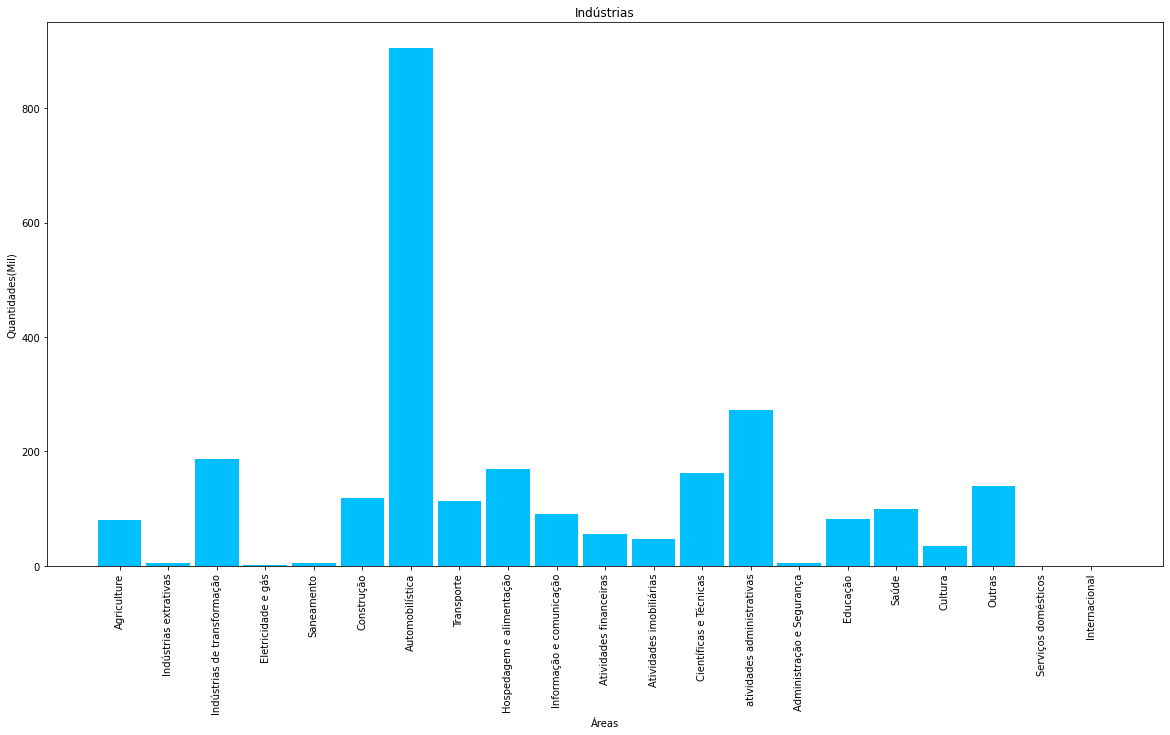

In [626]:
# Criando Principais tipos de Industria no suldeste
dados =  {'Agriculture':suldeste.COMP_A.sum()/1000,'Indústrias extrativas':suldeste.COMP_B.sum()/1000,'Indústrias de transformação':suldeste.COMP_C.sum()/1000,'Eletricidade e gás':suldeste.COMP_D.sum()/1000,'Saneamento':suldeste.COMP_E.sum()/1000,'Construção':suldeste.COMP_F.sum()/1000,'Automobilística':suldeste.COMP_G.sum()/1000,'Transporte':suldeste.COMP_H.sum()/1000,'Hospedagem e alimentação':suldeste.COMP_I.sum()/1000,'Informação e comunicação':suldeste.COMP_J.sum()/1000,'Atividades financeiras':suldeste.COMP_K.sum()/1000,'Atividades imobiliárias':suldeste.COMP_L.sum()/1000,'Científicas e Técnicas':suldeste.COMP_M.sum()/1000,'atividades administrativas':suldeste.COMP_N.sum()/1000,'Administração e Segurança':suldeste.COMP_O.sum()/1000,'Educação':suldeste.COMP_P.sum()/1000,'Saúde':suldeste.COMP_Q.sum()/1000,'Cultura':suldeste.COMP_R.sum()/1000,'Outras':suldeste.COMP_S.sum()/1000,'Serviços domésticos':suldeste.COMP_T.sum()/1000,'Internacional':suldeste.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

In [627]:
Dadossuldeste = [{'Capitais':suldeste.loc[(suldeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': suldeste['CITY'].count(),'Habitantes': suldeste['IBGE_RES_POP'].sum(), 'Empresas': suldeste['COMP_TOT'].sum(),'IDH': suldeste['IDHM'].mean(),'PIP': suldeste['GDP'].mean()}]
df_Dadossuldeste = pd.DataFrame(Dadossuldeste)
df_Dadossuldeste

,Capitais,Cidades,Habitantes,Empresas,IDH,PIP
0,4,1668,80364410,2574730,0.698984,1.997633e+06


# **CentroOeste**

In [628]:
#Capitais
# Listando as capitais da região com seus Numero de população, IDHM, indicação de região turistica e sua categoria.
Capitais = centroOeste.loc[centroOeste['CAPITAL'] == 1][['CITY','IBGE_RES_POP','STATE','IDHM','IDHM_dist','REGIAO_TUR','CATEGORIA_TUR']].sort_values('IDHM', ascending=False).reset_index()
Capitais

,index,CITY,IBGE_RES_POP,STATE,IDHM,IDHM_dist,REGIAO_TUR,CATEGORIA_TUR
0,719,Brasília,2570160,DF,0.824,Muito Alto,Brasília - Patrimônio Cultural Da Humanidade,A
1,1900,Goiânia,1302001,GO,0.799,Alto,Região Turística Dos Negócios E Tradições,A
2,1441,Cuiabá,551098,MT,0.785,Alto,Região Turística Metropolitana,A
3,933,Campo Grande,786797,MS,0.784,Alto,Caminho Dos Ipês,A


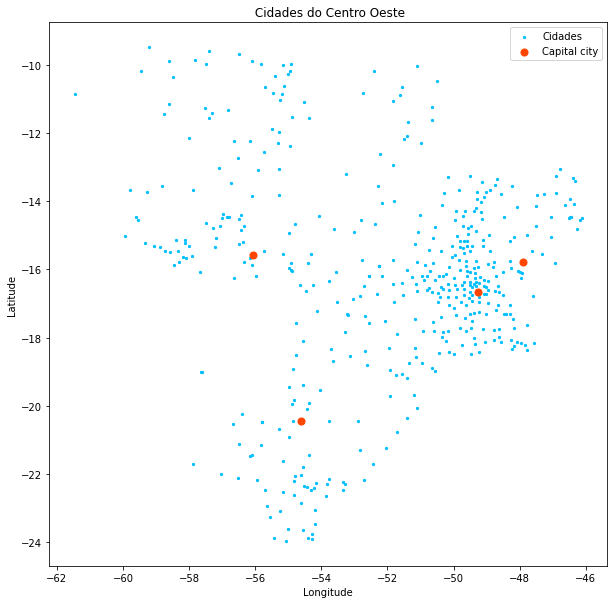

In [629]:
# Mapa do CentroOeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capcentroOeste = centroOeste['CAPITAL'] == 1

## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Centro Oeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capcentroOeste]["LONG"], df_brazil[long&lat&capcentroOeste]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

In [630]:
centroOeste['IDHM'].var()

0.0013905505745535087

In [631]:
centroOeste['IDHM'].mean()

0.6894678111587983

c:\Users\LeydsonMaycksonFerra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


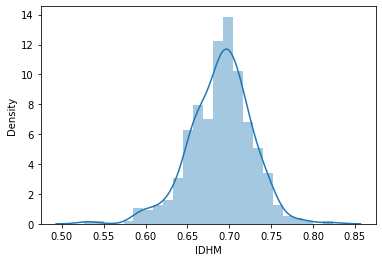

In [632]:
hist=sns.distplot(centroOeste['IDHM'])

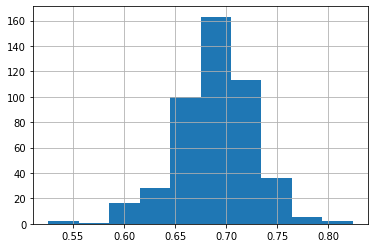

In [633]:
hist=centroOeste['IDHM'].hist()

<AxesSubplot:>

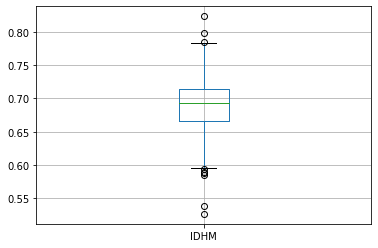

In [634]:
centroOeste.boxplot(column=['IDHM'])

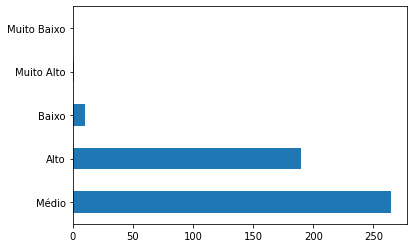

In [635]:
centroOeste['IDHM_dist'].value_counts().plot(kind='barh') 
plt.show()

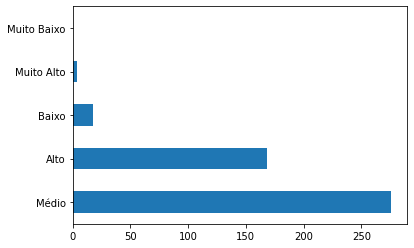

In [636]:
centroOeste['IDHM_Renda_dist'].value_counts().plot(kind='barh') 
plt.show()

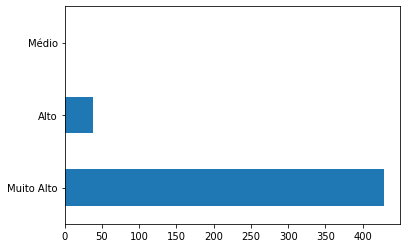

In [637]:
centroOeste['IDHM_Longevidade_dist'].value_counts().plot(kind='barh') 
plt.show()

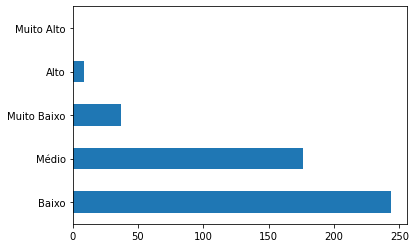

In [638]:
centroOeste['IDHM_Educacao_dist'].value_counts().plot(kind='barh') 
plt.show()

In [639]:
centroOeste.cov()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
IBGE_RES_POP,2.068580e+10,2.064306e+10,4.273480e+07,6.341160e+09,6.199957e+09,1.411982e+08,1.991564e+10,2.884390e+08,1.148324e+09,1.503346e+09,1.660040e+09,1.368580e+10,1.629694e+09,1.184127e+09,5.416454e+09,-3.272726e+07,1.677266e+03,2.097390e+03,4.784009e+02,2.184901e+03,2.414182e+04,-1.172926e+04,4.972775e+06,3.294131e+09,7.335750e+09,4.057073e+07,2.389289e+10,5.485323e+09,8.922702e+10,6.981137e+11,5.351708e+11,1.327997e+12,1.903480e+11,1.518345e+12,2.364636e+10,2.646244e+08,1.821473e+13,7.187732e+08,2.914481e+06,4.698691e+05,3.897688e+07,2.502083e+05,1.347199e+06,3.991807e+07,2.571788e+08,1.986579e+07,5.148763e+07,2.342994e+07,1.388637e+07,1.365391e+07,5.351972e+07,8.088554e+07,1.463234e+06,2.424231e+07,3.790065e+07,9.626801e+06,4.708373e+07,0.0,6.720271e+05,1.894706e+05,3.534188e+07,1.389652e+06,1.860659e+06,1.485533e+05,4.751911e+04,1.708558e+15,4.444344e+16,9.827738e+09,2.646416e+09,3.691170e+06,1.262637e+04,1.967530e+05,9.824635e+03,5.269547e+05
IBGE_RES_POP_BRAS,2.064306e+10,2.060043e+10,4.263195e+07,6.328089e+09,6.187208e+09,1.408763e+08,1.987465e+10,2.878448e+08,1.145961e+09,1.500245e+09,1.656621e+09,1.365765e+10,1.626334e+09,1.180610e+09,5.402754e+09,-3.267173e+07,1.674253e+03,2.093401e+03,4.775340e+02,2.181169e+03,2.414294e+04,-1.164634e+04,4.964509e+06,3.287115e+09,7.320515e+09,4.038872e+07,2.384356e+10,5.471506e+09,8.904969e+10,6.966156e+11,5.339797e+11,1.325117e+12,1.899366e+11,1.515053e+12,2.359739e+10,2.640551e+08,1.818224e+13,7.172941e+08,2.908710e+06,4.690308e+05,3.890179e+07,2.497599e+05,1.344560e+06,3.983680e+07,2.566560e+08,1.982573e+07,5.137957e+07,2.338015e+07,1.385836e+07,1.362555e+07,5.340821e+07,8.071680e+07,1.460117e+06,2.419222e+07,3.781986e+07,9.606580e+06,4.698383e+07,0.0,6.705071e+05,1.890824e+05,3.526741e+07,1.386834e+06,1.856661e+06,1.482660e+05,4.743392e+04,1.704772e+15,4.434342e+16,9.807113e+09,2.641380e+09,3.682998e+06,1.260220e+04,1.963373e+05,9.803764e+03,5.258670e+05
IBGE_RES_POP_ESTR,4.273480e+07,4.263195e+07,1.028489e+05,1.307071e+07,1.274879e+07,3.219119e+05,4.098719e+07,5.941909e+05,2.363183e+06,3.100898e+06,3.419060e+06,2.814986e+07,3.359995e+06,3.516836e+06,1.369975e+07,-5.553005e+04,3.013651e+00,3.988616e+00,8.669265e-01,3.731562e+00,-1.120235e+00,-8.291326e+01,8.265658e+03,7.015888e+06,1.523505e+07,1.820132e+05,4.932201e+07,1.381682e+07,1.773224e+08,1.498023e+09,1.191129e+09,2.880291e+09,4.113558e+08,3.291647e+09,4.896205e+07,5.692681e+05,3.249135e+10,1.479095e+06,5.771491e+03,8.383296e+02,7.508906e+04,4.484858e+02,2.638862e+03,8.127255e+04,5.228733e+05,4.005964e+04,1.080613e+05,4.979128e+04,2.801377e+04,2.836071e+04,1.115025e+05,1.687314e+05,3.117856e+03,5.009466e+04,8.079201e+04,2.022161e+04,9.989626e+04,0.0,1.519969e+03,3.882686e+02,7.446971e+04,2.818257e+03,3.997434e+03,2.872964e+02,8.519321e+01,3.785768e+12,1.000121e+14,2.062532e+07,5.036376e+06,8.171774e+03,2.417233e+01,4.157355e+02,2.087081e+01,1.087654e+03
IBGE_DU,6.341160e+09,6.328089e+09,1.307071e+07,1.946087e+09,1.903412e+09,4.267378e+07,6.108140e+09,8.834999e+07,3.515504e+08,4.600847e+08,5.083627e+08,4.198140e+09,5.016519e+08,3.530012e+08,1.627849e+09,-1.025874e+07,5.235314e+02,6.527645e+02,1.473613e+02,6.846303e+02,7.748373e+03,-3.769928e+03,1.524221e+06,1.006916e+09,2.253143e+09,1.134722e+07,7.322863e+09,1.660575e+09,2.748585e

<AxesSubplot:xlabel='IDHM', ylabel='COMP_TOT'>

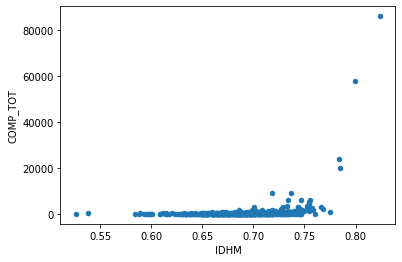

In [640]:
centroOeste.plot.scatter(x='IDHM',y='COMP_TOT')

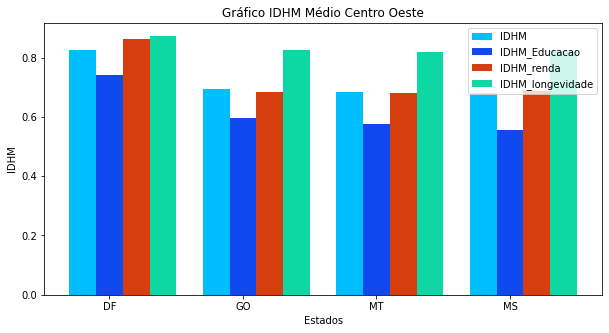

In [641]:
# Criando lista
dados1 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM_Educacao.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM_Educacao.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM_Educacao.mean(), 'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM_Educacao.mean()}
dados2 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM.mean(),'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM.mean()}
dados3 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM_Renda.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM_Renda.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM_Renda.mean(),'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM_Renda.mean()}
dados4 =  {'DF':centroOeste[centroOeste['STATE'] == 'DF'].IDHM_Longevidade.mean() ,'GO':centroOeste[centroOeste['STATE'] == 'GO'].IDHM_Longevidade.mean(), 'MT':centroOeste[centroOeste['STATE'] == 'MT'].IDHM_Longevidade.mean(),'MS':centroOeste[centroOeste['STATE'] == 'MS'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Centro Oeste")
plt.legend()
plt.show()


In [642]:
DadoscentroOeste = [{'Capitais':centroOeste.loc[(centroOeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': centroOeste['CITY'].count(),'Habitantes': centroOeste['IBGE_RES_POP'].sum(), 'Empresas': centroOeste['COMP_TOT'].sum(),'IDH': centroOeste['IDHM'].mean(),'PIP': centroOeste['GDP'].mean()}]
df_DadoscentroOeste = pd.DataFrame(DadoscentroOeste)
df_DadoscentroOeste

,Capitais,Cidades,Habitantes,Empresas,IDH,PIP
0,4,466,14058094,400957,0.689468,1.357094e+06


# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [643]:
df_brazil.describe()

,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5563.000000,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.0,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000,5.563000e+03,5.563000e+03,5.563000e+03,5.563000e+03,5563.000000,5563.000000,5563.000000,5563.000000,5563.000000
mean,3.428652e+04,3.420899e+04,77.532447,1.030173e+04,8.858399e+03,1443.332734,2.760334e+04,383.391156,1545.000719,2069.941758,2382.150998,1.821767e+04,3.005178e+03,1.417520e+04,5.737110e+04,2782.270897,0.659189,0.642911,0.801580,0.559131,-46.207464,-16.441194,417.669202,3.097927e+03,6.574868e+03,1525.524715,3.746662e+04,5.507143e+04,2.067202e+05,5.420554e+05,1.698443e+05,9.736914e+05,1.526967e+05,1.126388e+06,3.703291e+04,21124.391336,7.648571e+07,907.754988,18.273773,1.853496,73.527234,0.426568,2.030919,43.300557,348.355204,41.039008,55.940859,24.773144,15.570196,15.157109,51.353946,83.796153,3.271436,30.989754,34.190365,12.191803,51.663131,0.0,0.050333,0.499191,41.049973,2.032536,1.699443,0.788244,0.948948,5.514938e+09,3.607589e+09,9.856126e+03,4.876879e+03,5.751393,0.022470,0.127629,0.037749,2.037929
std,2.031486e+05,2.015262e+05,1796.200807,6.477685e+04,6.437040e+04,1691.464991,1.859907e+05,2327.219255,9254.720380,12315.687746,14188.572665,1.252281e+05,2.325197e+04,4.407418e+04,1.482177e+05,1606.438572,0.071990,0.080652,0.044673,0.093324,6.495145,8.287122,288.746554,3.581715e+04,8.805203e+04,5609.631852,2.201051e+05,9.209407e+04,1.298378e+06,7.143538e+06,1.560182e+06,9.424157e+06,1.966984e+06,1.136738e+07,2.171479e+05,20319.700288,7.419256e+08,8338.962484,81.091139,6.183133,500.174071,6.342223,11.761479,407.729268,2431.902618,300.714007,484.505767,547.933530,341.047131,212.830232,767.968663,1233.339892,6.061327,261.168458,366.500654,122.408337,429.979887,0.0,1.928976,2.865646,308.007141,26.580819,11.246922,1.781308,1.069628,2.779491e+11,1.165895e+11,9.187892e+04,2.094232e+04,55.375420,0.148219,2.154304,0.534006,4.383721
min,8.050000e+02,8.050000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,1.740000e+02,0.000000,5.000000,7.000000,12.000000,9.400000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.000000,0.418000,0.400000,0.672000,0.207000,-72.916500,-33.687600,0.000000,1.000000e+00,3.000000e+00,3.565000,7.860000e+02,0.000000e+00,3.610000e+02,2.036000e+03,7.258000e+03,1.133500e+04,-1.415900e+04,1.167500e+04,8.150000e+02,3191.000000,0.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [644]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [645]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

<AxesSubplot:xlabel='RURAL_URBAN'>

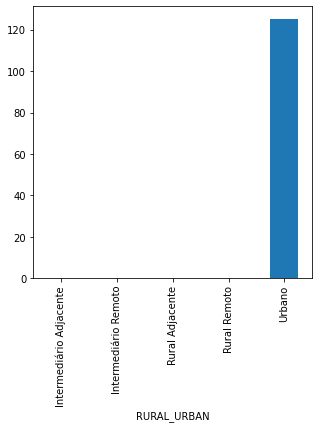

In [646]:
# gráfico mostrando que só há uber na área urbana
df_brazil.groupby('RURAL_URBAN')['UBER'].sum().plot(kind='bar',figsize=(5,5))

<AxesSubplot:ylabel='None'>

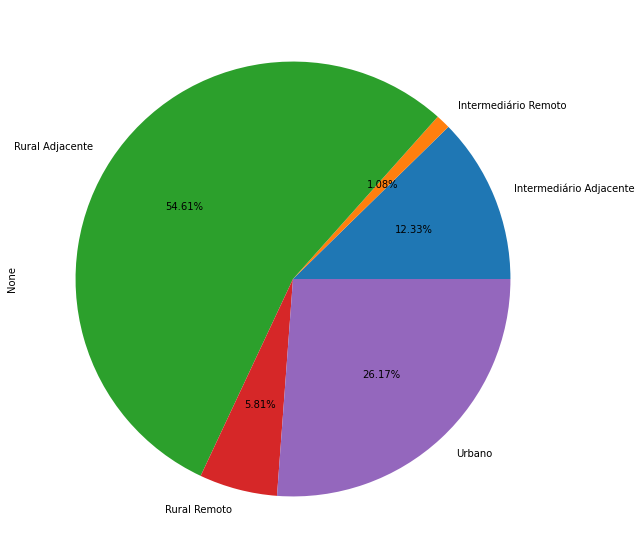

In [647]:
#Porcentagem correpondente de cada tipologia

df_brazil.groupby(['RURAL_URBAN']).size().plot(kind='pie', autopct='%0.2f%%', figsize=(10,10))

In [648]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)]
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] <  3565)].index, inplace=True)

In [649]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)]
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP']< 3.565)].index, inplace=True)

<h1> <font color ="yellow">Limpeza</font> <font color="green">dos dados</font><h1>

<h3>Univariado usando Z-Score robusto<h3>

In [650]:
df_brazil['TAXES'].value_counts()

7582        2
4075        2
2272        1
4785        1
6850        1
5824        1
1531        1
14906       1
60090       1
296633      1
314910      1
117430      1
32443       1
6175        1
11952       1
18519       1
6831        1
58030       1
21164       1
3754        1
726697      1
28327       1
2725        1
1200804     1
61090       1
15009       1
75462       1
80588       1
2632        1
9939        1
591         1
2815        1
12030       1
1564        1
51962       1
5880        1
52983       1
17100       1
69338       1
3821        1
157415      1
8933        1
403172      1
28387       1
141025      1
69344       1
139818      1
212701      1
110299      1
2778        1
1753        1
32480       1
13667       1
18965       1
668         1
3844        1
35388       1
20054       1
397909      1
174676      1
14929       1
61007       1
75341       1
25160       1
49734       1
610882      1
85568       1
30266       1
85592       1
7731        1
1586        1
41215 

In [651]:
df_brazil['TAXES'].describe()

count    4.260000e+02
mean     2.129235e+05
std      1.595879e+06
min      5.910000e+02
25%      6.292750e+03
50%      2.008100e+04
75%      6.898725e+04
max      2.914558e+07
Name: TAXES, dtype: float64

<AxesSubplot:>

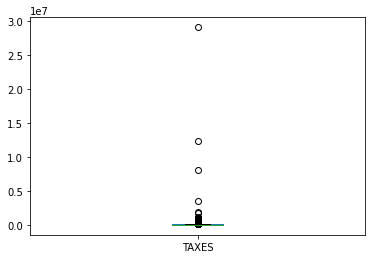

In [652]:
# Plotando o gráfico para ver as outliers
df_brazil['TAXES'].plot.box()

<AxesSubplot:>

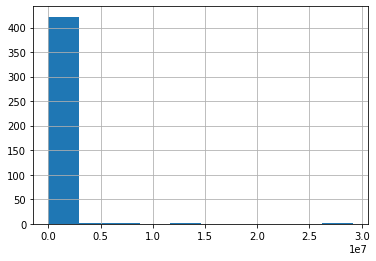

In [653]:
df_brazil['TAXES'].hist()

<AxesSubplot:>

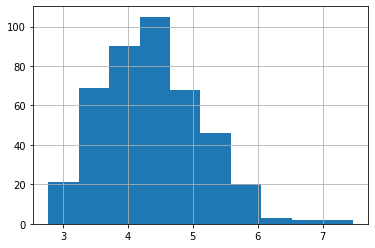

In [654]:
 # Como visto em cima , os dados não estão simétricos , então aplicamos log10
 df_brazil['TAXES_Log'] = log10(df_brazil['TAXES'])
 df_brazil['TAXES_Log'].hist()

In [655]:
# Usando z-core robusto
from numpy import abs
mad = abs(df_brazil['TAXES_Log'] - df_brazil['TAXES_Log'].median()).median()*(1/0.6745)
print(mad)

0.7598219750170238


<AxesSubplot:>

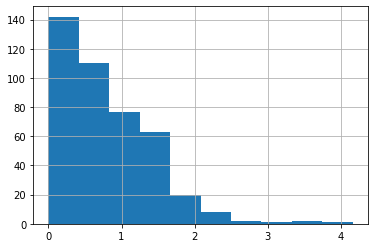

In [656]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad).hist()

In [657]:
# Usando a limiar > 2.5, encontro os outliers
df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad > 2.5]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDHM_dist,IDHM_Renda_dist,IDHM_Longevidade_dist,IDHM_Educacao_dist,TAXES_Log
719,Brasília,DF,1,2570160,2564370,5790,774820,751558,23261,2450634,35833,143641,190078,207283,1683918,189881,162894,822413,9,0.824,0.863,0.873,0.742,-47.8879,-15.7941,1115.2484,460682,920410,5760.783,Brasília - Patrimônio Cultural Da Humanidade,A,2974703,Urbano,820755,9659849,103819470,92051448,206351521,29145585,235497107,2977216,79100.0,"Administração, defesa, educação e saúde públic...",0,86200,242,42,3269,22,130,4685,29018,2157,6788,3254,1527,1670,6717,10346,204,3043,5363,1197,6403,0,123,23,4960,150,274,14,4,292093270172,8016164488595,1288107,211392,594,1,28,1,60,Muito Alto,Muito Alto,Muito Alto,Alto,7.464573
933,Campo Grande,MS,1,786797,785017,1780,250542,247159,3383,765394,11390,44074,54942,63075,515538,76375,84434,209002,108,0.784,0.790,0.844,0.724,-54.6157,-20.4580,544.5121,99092,240380,8092.951,Caminho Dos Ipês,A,885711,Urbano,308918,3792766,12943149,4895739,21940571,3497357,25437928,863982,29443.0,Demais serviços,2662884470,23872,264,20,1229,4,72,1448,9121,1096,1453,628,350,413,1863,2165,74,714,941,405,1612,0,0,5,687,58,43,8,3,9588640536,122580555181,302311,169030,123,1,4,1,24,Alto,Alto,Muito Alto,Alto,6.543740
2849,Manaus,AM,1,1802014,1798773,3241,461426,458959,2467,1760829,32853,125335,161262,175966,1159569,105844,890,25198,852,0.737,0.738,0.826,0.658,-60.0233,-3.1347,34.3563,234594,236595,11401.092,Polo Amazônico,A,2145444,Urbano,212145,25131157,24632349,7887482,57863132,12433232,70296364,2094391,33564.0,Indústrias de transformação,4003955249,21586,36,6,1478,10,91,1286,8656,995,1325,418,206,211,1418,1911,97,1021,1100,218,1098,0,5,34,3401,69,49,8,3,13996268907,232305730782,373985,192002,77,1,3,0,21,Alto,Alto,Muito Alto,Médio,7.094584
3927,Porto Velho,RO,1,428527,427841,686,119755,109628,10126,387189,6289,25876,33155,37690,262419,21760,48577,332551,890,0.736,0.764,0.819,0.638,-63.8314,-8.7689,86.8954,33953,78677,34090.954,Polo Porto Velho,A,519531,Urbano,542219,3471803,5919603,2905512,12839137,1902607,14741744,511219,28836.0,Demais serviços,1112542140,8883,52,28,524,6,19,431,3976,248,649,131,122,96,503,705,24,296,433,94,546,0,0,1,348,20,21,3,3,1888267091,16961139220,113792,108884,10,1,1,0,16,Alto,Alto,Muito Alto,Médio,6.279349
5326,Uberaba,MG,0,295988,295644,344,96944,94685,2259,285743,3461,13981,17792,20904,193561,36044,241142,1109748,212,0.772,0.772,0.845,0.705,-47.9836,-19.7135,777.4575,36393,105737,4523.957,Alta Mogiana,B,330361,Urbano,769478,3763235,5951960,1281584,11766258,1687337,13453594,325279,41360.0,Demais serviços,868573795,10670,162,17,941,2,25,578,4303,487,809,172,160,163,621,882,10,301,407,129,501,0,0,0,0,25,11,4,2,3204456039,8100860683,122698,60104,27,1,3,1,11,Alto,Alto,Muito Alto,Alto,6.227202
5327,Uberlândia,MG,0,604013,603274,739,196195,191137,5058,580561,7522,29862,38797,43553,401473,59354,104672,440667,72,0.789,0.776,0.885,0.716,-48.2780,-18.9190,866.7823,63571,252242,4115.206,Alta Mogiana,B,683247,Urbano,556693,6267618,15005187,2682010,24511508,8024748,32536256,669672,48585.0,Demais serviços,1698288997,25562,173,31,1669,4,40,1782,9438,1395,1317,773,479,532,1713,2795,11,800,1085,337,1188,0,0,2,442,46,23,8,2,32121822440,35931873949,247595,119057,391,1,4,1,22,Alto,Alto,

In [658]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad < 2.5]

<AxesSubplot:>

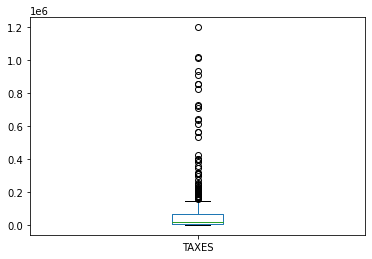

In [659]:
df_brazil['TAXES'].plot.box()